In [280]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [281]:
df_2024 = pd.read_excel("2024.xlsx")
df_2023 = pd.read_excel("2023.xlsx")
df_2022 = pd.read_excel("2022.xlsx")
df_2021 = pd.read_excel("2021.xlsx")
df_2020 = pd.read_excel("2020.xlsx")

# "Kuruluş Adı" dışındaki verileri numeric hale getirdim.
def numeric(df):
    for col in df.columns:
        if col != "Kuruluş Adı":
            df[col] = pd.to_numeric(df[col], errors="coerce")
    return df

all_datas = ["2020.xlsx", "2021.xlsx", "2022.xlsx", "2023.xlsx", "2024.xlsx"]
df_list = [numeric(pd.read_excel(file)) for file in all_datas]
df_all = pd.concat(df_list, ignore_index=True)

cols = [
    "Üretimden Satışlar (Net) (TL)",
    "Dönem Karı/Zararı (Vergi Öncesi) (TL)",
    "İhracat (Bin $)",
    "Brüt Katma Değer (TL)",
]
df_all[cols] = df_all[cols].replace(0, np.nan)

df_all["Kuruluş Adı"] = df_all["Kuruluş Adı"].str.strip()


df_grouped = df_all.groupby("Yıl")[["Üretimden Satışlar (Net) (TL)", "İhracat (Bin $)"]].sum().reset_index()
df_grouped

,Yıl,Üretimden Satışlar (Net) (TL),İhracat (Bin $)
0,2020,1.127714e+12,46086970.0
1,2021,1.969973e+12,62067991.0
2,2022,4.425983e+12,74463688.0
3,2023,6.289713e+12,69742037.0
4,2024,8.580725e+12,71141353.0


In [282]:
# Her iki column için yıl bazında yüzdesel büyümeyi hesapladım.
df_grouped["Üretimden Satışlar (Net) (TL) Büyüme (%)"] = df_grouped["Üretimden Satışlar (Net) (TL)"].pct_change() * 100
df_grouped["İhracat (Bin $) Büyüme (%)"] = df_grouped["İhracat (Bin $)"].pct_change() * 100
df_grouped

,Yıl,Üretimden Satışlar (Net) (TL),İhracat (Bin $),Üretimden Satışlar (Net) (TL) Büyüme (%),İhracat (Bin $) Büyüme (%)
0,2020,1.127714e+12,46086970.0,NaN,NaN
1,2021,1.969973e+12,62067991.0,74.687293,34.675790
2,2022,4.425983e+12,74463688.0,124.672310,19.971159
3,2023,6.289713e+12,69742037.0,42.108832,-6.340877
4,2024,8.580725e+12,71141353.0,36.424739,2.006417


In [283]:
# 5 yıllık büyüme verilerini hesapladım.
# Üretimden Satışlar (Net) büyüme %
satis_2020 = df_grouped.loc[df_grouped["Yıl"] == 2020, "Üretimden Satışlar (Net) (TL)"].values[0]
satis_2024 = df_grouped.loc[df_grouped["Yıl"] == 2024, "Üretimden Satışlar (Net) (TL)"].values[0]

satis_buyume_2020_2024 = ((satis_2024 - satis_2020) / satis_2020) * 100

# İhracat büyüme %
ihracat_2020 = df_grouped.loc[df_grouped["Yıl"] == 2020, "İhracat (Bin $)"].values[0]
ihracat_2024 = df_grouped.loc[df_grouped["Yıl"] == 2024, "İhracat (Bin $)"].values[0]

ihracat_buyume_2020_2024 = ((ihracat_2024 - ihracat_2020) / ihracat_2020) * 100

print("2020-2024 Üretimden Satışlar Büyüme (%):", satis_buyume_2020_2024)
print("2020-2024 İhracat Büyüme (%):", ihracat_buyume_2020_2024)

2020-2024 Üretimden Satışlar Büyüme (%): 660.8955944049046
2020-2024 İhracat Büyüme (%): 54.36326796923295


In [284]:
# Son 5 yılın her senesinde ilk 500'de olmayan firmalar için ikinci 500 listelerini de import ettim.
df_2023_ikinci = pd.read_excel("2023_ikinci.xlsx")
df_2022_ikinci = pd.read_excel("2022_ikinci.xlsx")
df_2021_ikinci = pd.read_excel("2021_ikinci.xlsx")
df_2020_ikinci = pd.read_excel("2020_ikinci.xlsx")

all_datas_ikinci = ["2020_ikinci.xlsx", "2021_ikinci.xlsx", "2022_ikinci.xlsx", "2023_ikinci.xlsx"]
df_list_ikinci = [numeric(pd.read_excel(file)) for file in all_datas_ikinci]
df_all_ikinci = pd.concat(df_list_ikinci, ignore_index=True)
df_all_ikinci

,Genel Sıra No,Kuruluş Adı,Yıl,Üretimden Satışlar (Net) (TL),Brüt Katma Değer (TL),Dönem Karı/Zararı (Vergi Öncesi) (TL),İhracat (Bin $),İhracat - Genel Sıra No,Ücretle Çalışanlar Ortalaması (Kişi)
0,1,Murat Ticaret Kablo Sanayi A.Ş.,2020,5.788966e+08,205837467.0,106899055.0,57860.0,17.0,NaN
1,2,Metal Matris San. ve Tic. A.Ş.,2020,5.788718e+08,NaN,NaN,NaN,NaN,NaN
2,3,RTM Tarım Kimya San. ve Tic. A.Ş.,2020,5.714727e+08,NaN,NaN,NaN,NaN,NaN
3,4,Arbel Bakliyat Hububat San. ve Tic. A.Ş.,2020,5.712493e+08,NaN,NaN,NaN,NaN,NaN
4,5,Söke Değirmencilik San. ve Tic. A.Ş.,2020,5.709359e+08,61471331.0,15557761.0,64.0,462.0,352.0
...,...,...,...,...,...,...,...,...,...
1995,496,Kar-El Demir Tel San. ve Tic. Ltd. Şti.,2023,1.302796e+09,272381195.0,17986299.0,34057.0,194.0,186.0
1996,497,Milteks Tekstil San. ve Tic. A.Ş.,2023,1.301958e+09,NaN,NaN,NaN,NaN,NaN
1997,498,Durkar Halı Tekstil San. ve Tic. A.Ş.,2023,1.301797e+09,531480023.0,235613512.0,28447.0,230.0,708.0
1998,499,Parteks Kağıt Endüstrisi A.Ş.,2023,1.301689e+09,NaN,NaN,NaN,NaN,NaN


In [285]:
# Her fimada ayrı ayrı yüzdesel büyümeyi hesaplamamak için fonksiyon yazıp onu kullanacağım.
def büyüme_columnları(df):
    kolonlar = [
        "Üretimden Satışlar (Net) (TL)",
        "Dönem Karı/Zararı (Vergi Öncesi) (TL)",
        "İhracat (Bin $)"
    ]

    df = df.sort_values("Yıl").reset_index(drop=True)

    for col in kolonlar:
        # Yıllık büyüme yüzdesi
        df[f"{col} Büyüme (%)"] = df[col].pct_change() * 100

        # 2020–2024 büyümesi
        try:
            val_2020 = df.loc[df["Yıl"] == 2020, col].values[0]
            val_2024 = df.loc[df["Yıl"] == 2024, col].values[0]
            toplam_buyume = ((val_2024 - val_2020) / val_2020) * 100
            print(f"2020-2024 {col} Büyüme (%): {toplam_buyume:.2f}")
        except IndexError:
            print(f"2020 veya 2024 yılı verisi eksik: {col}")

    return df

In [286]:
# Savunma sanayisi firmalarını filtreledim.
# ROKETSAN
df_roketsan = df_all[df_all["Kuruluş Adı"].str.contains("ROKETSAN", case=False, na=False)]
df_roketsan = büyüme_columnları(df_roketsan)
df_roketsan

2020-2024 Üretimden Satışlar (Net) (TL) Büyüme (%): 1019.73
2020-2024 Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%): 855.98
2020-2024 İhracat (Bin $) Büyüme (%): nan


,Genel Sıra No,Kuruluş Adı,Yıl,Üretimden Satışlar (Net) (TL),Brüt Katma Değer (TL),Dönem Karı/Zararı (Vergi Öncesi) (TL),İhracat (Bin $),İhracat - Genel Sıra No,Ücretle Çalışanlar Ortalaması (Kişi),Üretimden Satışlar (Net) (TL) Büyüme (%),Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%),İhracat (Bin $) Büyüme (%)
0,56,ROKETSAN Roket San. ve Tic. A.Ş.,2020,3.822998e+09,2.212250e+09,6.565967e+08,NaN,NaN,NaN,NaN,NaN,NaN
1,59,ROKETSAN Roket San. ve Tic. A.Ş.,2021,6.390469e+09,4.354644e+09,1.109370e+09,NaN,NaN,NaN,67.158563,68.957548,NaN
2,65,ROKETSAN Roket San. ve Tic. A.Ş.,2022,1.285872e+10,8.679218e+09,3.480988e+09,NaN,NaN,NaN,101.217137,213.780679,NaN
3,50,ROKETSAN Roket San. ve Tic. A.Ş.,2023,2.247268e+10,1.399021e+10,3.975049e+09,359166.0,39.0,4865.0,74.766062,14.193130,NaN
4,35,ROKETSAN Roket San. ve Tic. A.Ş.,2024,4.280729e+10,2.619439e+10,6.276957e+09,369330.0,40.0,5012.0,90.485932,57.908928,2.829889


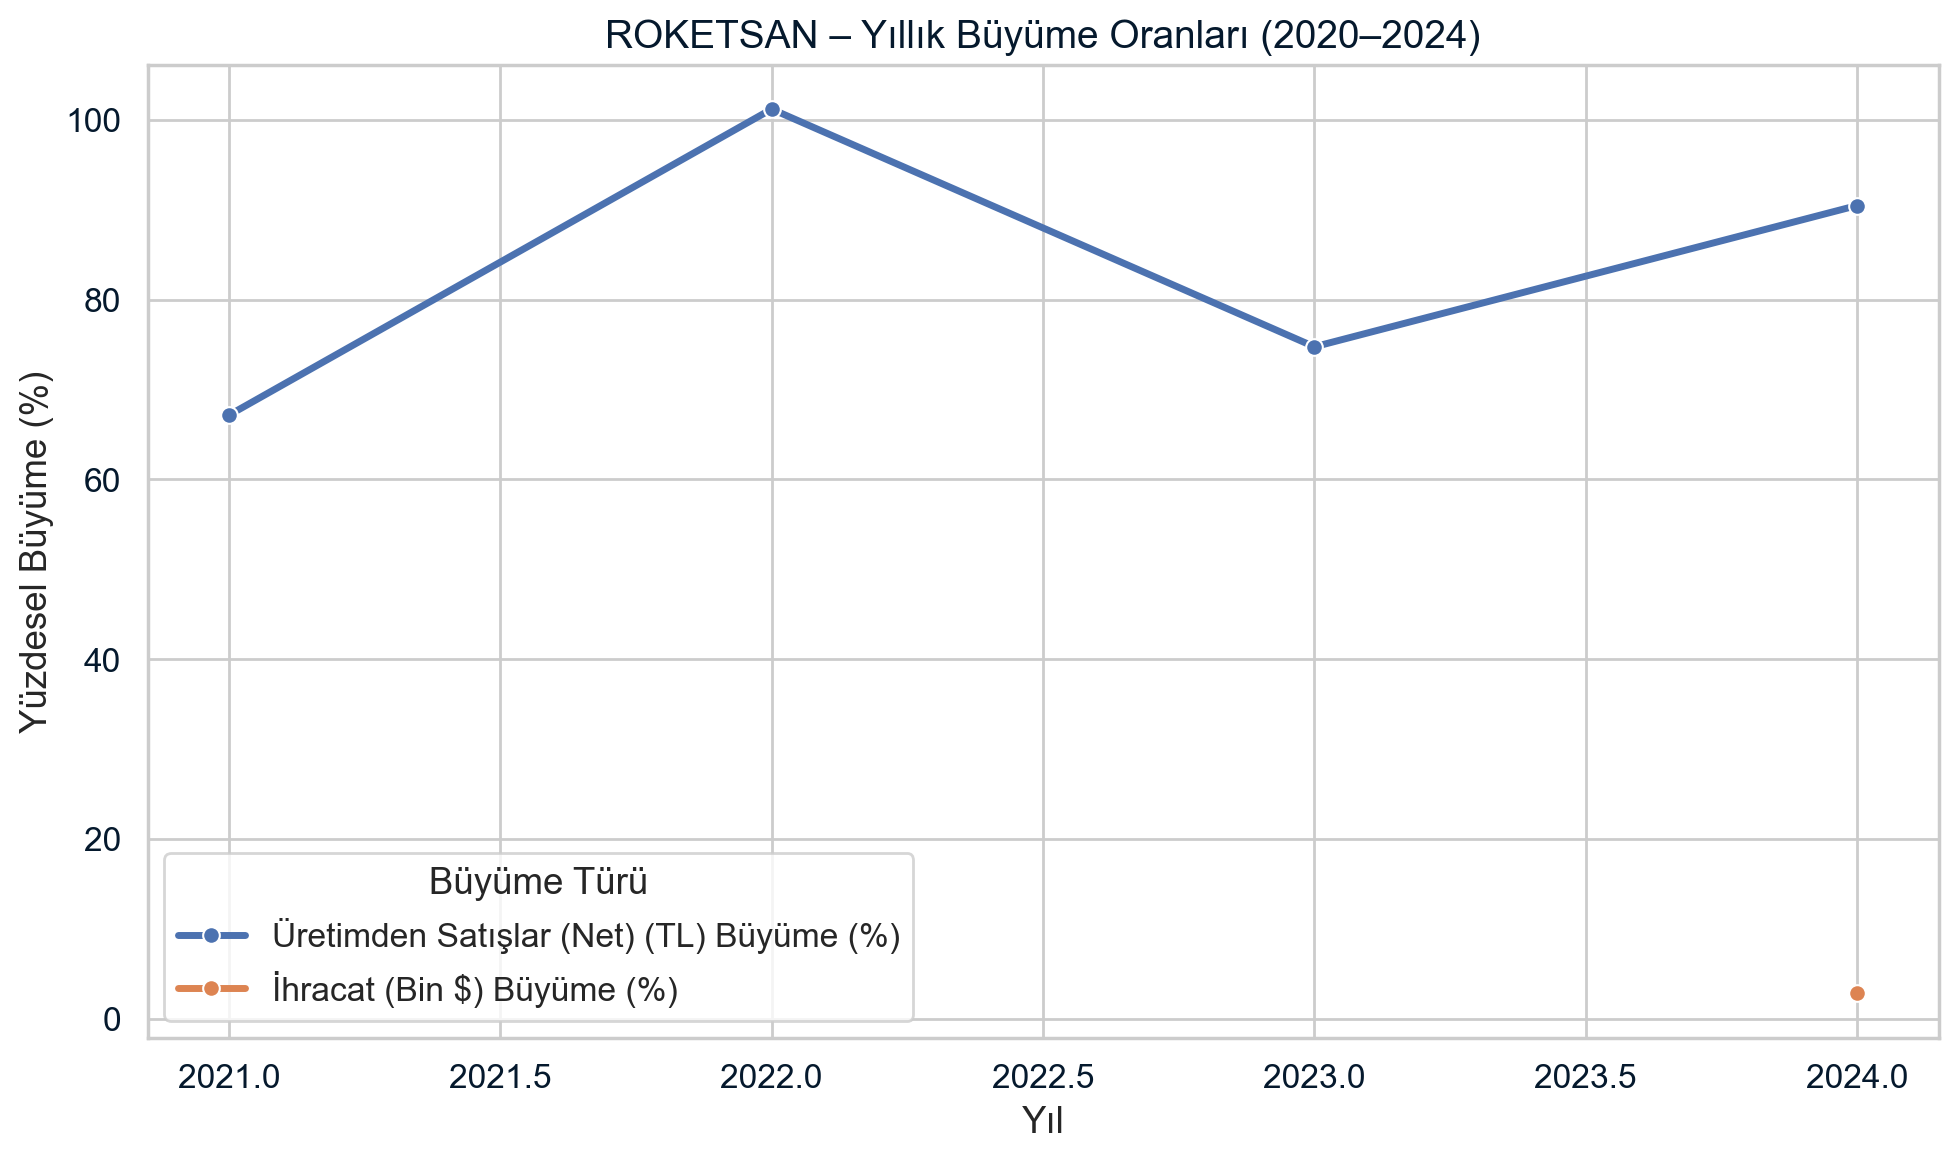

In [287]:
# ROKETSAN GRAPH
df_roketsan_plot = df_roketsan.copy()

df_melted_roketsan = df_roketsan_plot[["Yıl", 
                              "Üretimden Satışlar (Net) (TL) Büyüme (%)", 
                              "İhracat (Bin $) Büyüme (%)"]].melt(
    id_vars="Yıl", 
    var_name="Kalem", 
    value_name="Büyüme (%)"
)

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted_roketsan, x="Yıl", y="Büyüme (%)", hue="Kalem", marker="o", linewidth=2.5)

plt.title("ROKETSAN – Yıllık Büyüme Oranları (2020–2024)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Yüzdesel Büyüme (%)")
plt.legend(title="Büyüme Türü")
plt.tight_layout()
plt.show()

In [288]:
# MKE (2020'deki ismi farklı olduğu için ismini rename etmem gerekti)
df_all.loc[
    (df_all["Yıl"] == 2020) & 
    (df_all["Kuruluş Adı"] == "Makina ve Kimya Endüstrisi Kurumu (MKEK) Genel Müdürlüğü"),
    "Kuruluş Adı"
] = "Makine ve Kimya Endüstrisi A.Ş."
df_mke = df_all[df_all["Kuruluş Adı"].str.contains("Makine ve Kimya", case=False, na=False)]
df_mke = büyüme_columnları(df_mke)
df_mke

2020-2024 Üretimden Satışlar (Net) (TL) Büyüme (%): 548.21
2020-2024 Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%): 98.32
2020-2024 İhracat (Bin $) Büyüme (%): 3580.98


,Genel Sıra No,Kuruluş Adı,Yıl,Üretimden Satışlar (Net) (TL),Brüt Katma Değer (TL),Dönem Karı/Zararı (Vergi Öncesi) (TL),İhracat (Bin $),İhracat - Genel Sıra No,Ücretle Çalışanlar Ortalaması (Kişi),Üretimden Satışlar (Net) (TL) Büyüme (%),Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%),İhracat (Bin $) Büyüme (%)
0,90,Makine ve Kimya Endüstrisi A.Ş.,2020,2.659526e+09,1.840339e+09,9.257888e+08,17370.0,380.0,5466.0,NaN,NaN,NaN
1,121,Makine ve Kimya Endüstrisi A.Ş.,2021,3.489934e+09,NaN,NaN,NaN,NaN,NaN,31.223917,0.000000,0.000000
2,137,Makine ve Kimya Endüstrisi A.Ş.,2022,6.823901e+09,4.647509e+09,3.309516e+09,43505.0,354.0,2958.0,95.530911,257.480656,150.460564
3,181,Makine ve Kimya Endüstrisi A.Ş.,2023,7.787621e+09,5.867202e+09,3.156637e+09,454183.0,29.0,3180.0,14.122724,-4.619363,943.978853
4,109,Makine ve Kimya Endüstrisi A.Ş.,2024,1.723940e+10,9.594852e+09,1.836027e+09,639386.0,22.0,3871.0,121.369292,-41.835987,40.777176


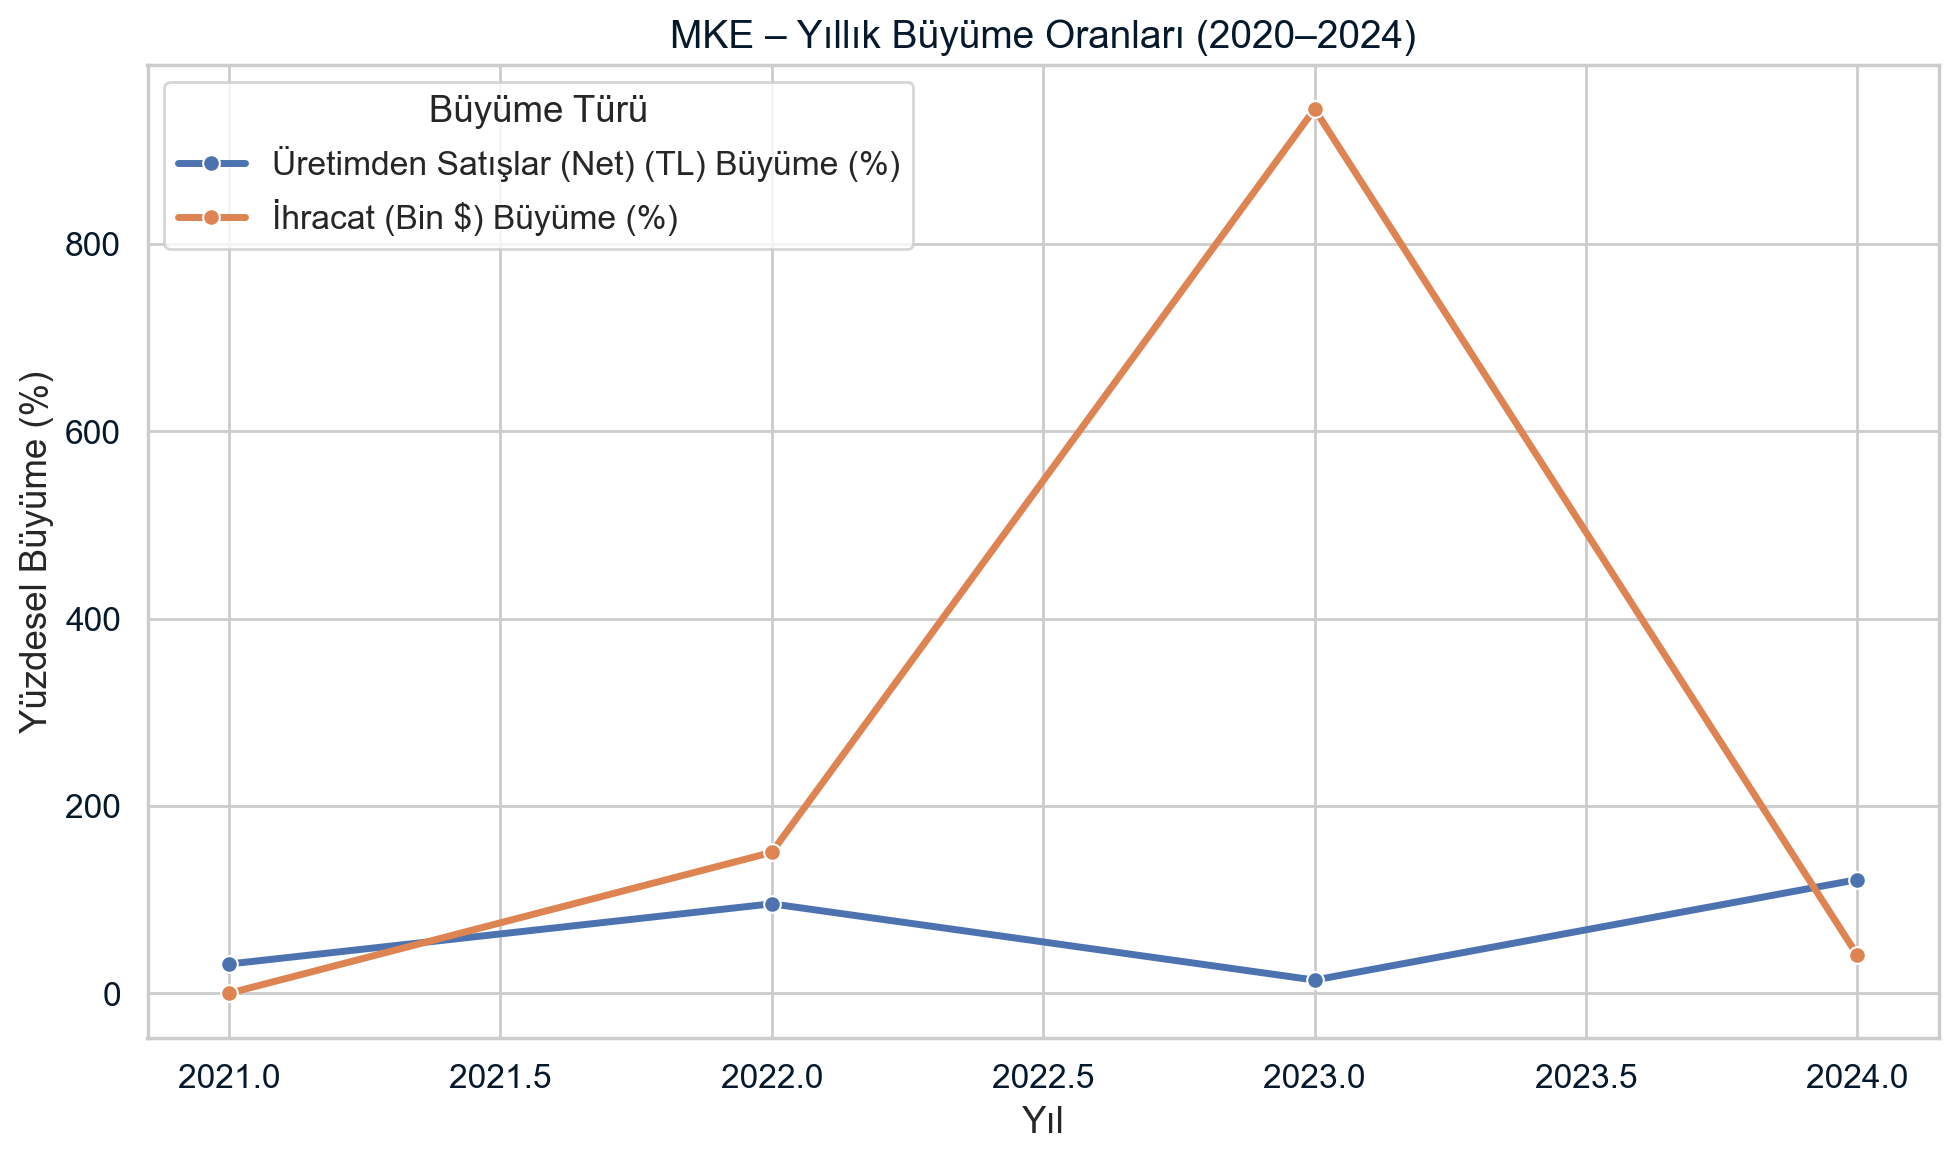

In [289]:
# MKE GRAPH
df_mke_plot = df_mke.copy()

df_melted_mke = df_mke[["Yıl", 
                              "Üretimden Satışlar (Net) (TL) Büyüme (%)", 
                              "İhracat (Bin $) Büyüme (%)"]].melt(
    id_vars="Yıl", 
    var_name="Kalem", 
    value_name="Büyüme (%)"
)

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted_mke, x="Yıl", y="Büyüme (%)", hue="Kalem", marker="o", linewidth=2.5)

plt.title("MKE – Yıllık Büyüme Oranları (2020–2024)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Yüzdesel Büyüme (%)")
plt.legend(title="Büyüme Türü")
plt.tight_layout()
plt.show()

In [290]:
# Samsun Yurt Savunma
# 2024 ve 2023'te ilk 500'de ancak 2020, 2021 ve 2022'de ikinci 500'de.
df_sys = df_all[df_all["Kuruluş Adı"].str.contains("Samsun Yurt", case=False, na=False)]
df_sys

df_sys_ikinci = df_all_ikinci[df_all_ikinci["Kuruluş Adı"].str.contains("Samsun Yurt", case=False, na=False)]
df_sys_ikinci

df_sys_tüm = pd.concat([df_sys, df_sys_ikinci], ignore_index=True)
df_sys_tüm = df_sys_tüm.sort_values(by="Yıl").reset_index(drop=True)

df_sys = büyüme_columnları(df_sys_tüm)
df_sys

2020-2024 Üretimden Satışlar (Net) (TL) Büyüme (%): 1311.69
2020-2024 Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%): 972.34
2020-2024 İhracat (Bin $) Büyüme (%): 244.59


,Genel Sıra No,Kuruluş Adı,Yıl,Üretimden Satışlar (Net) (TL),Brüt Katma Değer (TL),Dönem Karı/Zararı (Vergi Öncesi) (TL),İhracat (Bin $),İhracat - Genel Sıra No,Ücretle Çalışanlar Ortalaması (Kişi),Üretimden Satışlar (Net) (TL) Büyüme (%),Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%),İhracat (Bin $) Büyüme (%)
0,107,Samsun Yurt Savunma San. ve Tic. A.Ş.,2020,4.542563e+08,2.100736e+08,1.166226e+08,49786.0,41.0,525.0,NaN,NaN,NaN
1,163,Samsun Yurt Savunma San. ve Tic. A.Ş.,2021,7.594107e+08,3.144138e+08,1.822575e+08,77483.0,19.0,585.0,67.176705,56.279701,55.632105
2,244,Samsun Yurt Savunma San. ve Tic. A.Ş.,2022,1.359849e+09,5.321623e+08,2.328122e+08,69875.0,54.0,678.0,79.066393,27.738078,-9.818928
3,424,Samsun Yurt Savunma San. ve Tic. A.Ş.,2023,3.443072e+09,1.195901e+09,5.226441e+08,135629.0,149.0,806.0,153.195118,124.491719,94.102326
4,323,Samsun Yurt Savunma San. ve Tic. A.Ş.,2024,6.412680e+09,3.255318e+09,1.250593e+09,171558.0,133.0,870.0,86.248794,139.282053,26.490647


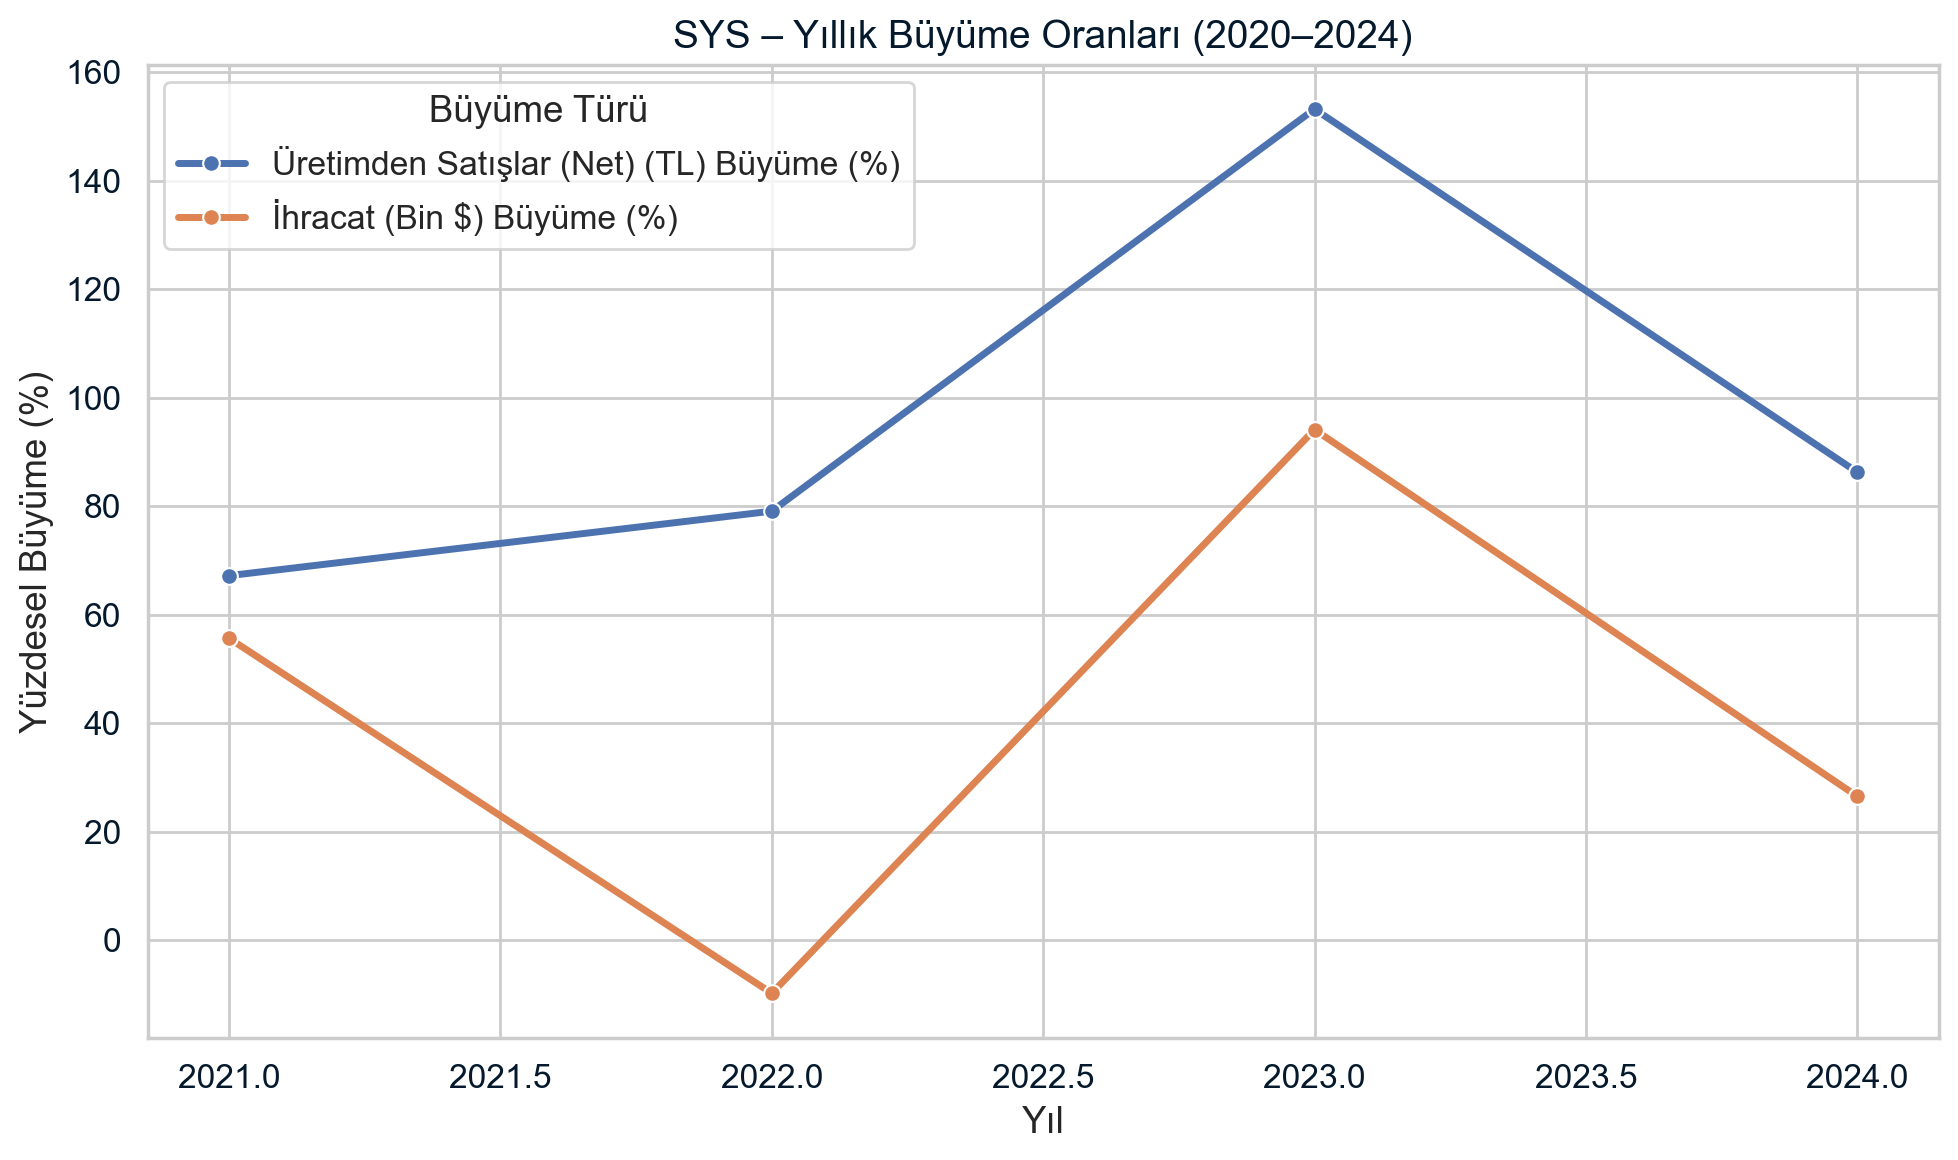

In [291]:
# SYS GRAPH
df_sys_plot = df_sys.copy()

df_melted_sys = df_sys[["Yıl", 
                              "Üretimden Satışlar (Net) (TL) Büyüme (%)", 
                              "İhracat (Bin $) Büyüme (%)"]].melt(
    id_vars="Yıl", 
    var_name="Kalem", 
    value_name="Büyüme (%)"
)

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted_sys, x="Yıl", y="Büyüme (%)", hue="Kalem", marker="o", linewidth=2.5)

plt.title("SYS – Yıllık Büyüme Oranları (2020–2024)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Yüzdesel Büyüme (%)")
plt.legend(title="Büyüme Türü")
plt.tight_layout()
plt.show()

In [292]:
# ASELSAN
df_aselsan = df_all[df_all["Kuruluş Adı"].str.contains("ASELSAN", case=False, na=False)]
df_aselsan = büyüme_columnları(df_aselsan)
df_aselsan

2020-2024 Üretimden Satışlar (Net) (TL) Büyüme (%): 494.05
2020-2024 Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%): 319.93
2020-2024 İhracat (Bin $) Büyüme (%): 51.03


,Genel Sıra No,Kuruluş Adı,Yıl,Üretimden Satışlar (Net) (TL),Brüt Katma Değer (TL),Dönem Karı/Zararı (Vergi Öncesi) (TL),İhracat (Bin $),İhracat - Genel Sıra No,Ücretle Çalışanlar Ortalaması (Kişi),Üretimden Satışlar (Net) (TL) Büyüme (%),Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%),İhracat (Bin $) Büyüme (%)
0,11,Aselsan Elektronik San. ve Tic. A.Ş.,2020,1.323681e+10,7.292607e+09,3.947820e+09,122927.0,113.0,8323.0,NaN,NaN,NaN
1,17,Aselsan Elektronik San. ve Tic. A.Ş.,2021,1.813691e+10,1.036272e+10,4.608798e+09,111715.0,175.0,8735.0,37.018697,16.742866,-9.120860
2,20,Aselsan Elektronik San. ve Tic. A.Ş.,2022,3.297874e+10,2.073210e+10,1.022498e+10,222500.0,99.0,9603.0,81.832224,121.857881,99.167525
3,19,Aselsan Elektronik San. ve Tic. A.Ş.,2023,5.362543e+10,3.066483e+10,1.187409e+10,196365.0,104.0,9718.0,62.606046,16.128202,-11.746067
4,17,Aselsan Elektronik San. ve Tic. A.Ş.,2024,7.863388e+10,4.730525e+10,1.657826e+10,185654.0,122.0,11003.0,46.635430,39.617133,-5.454638


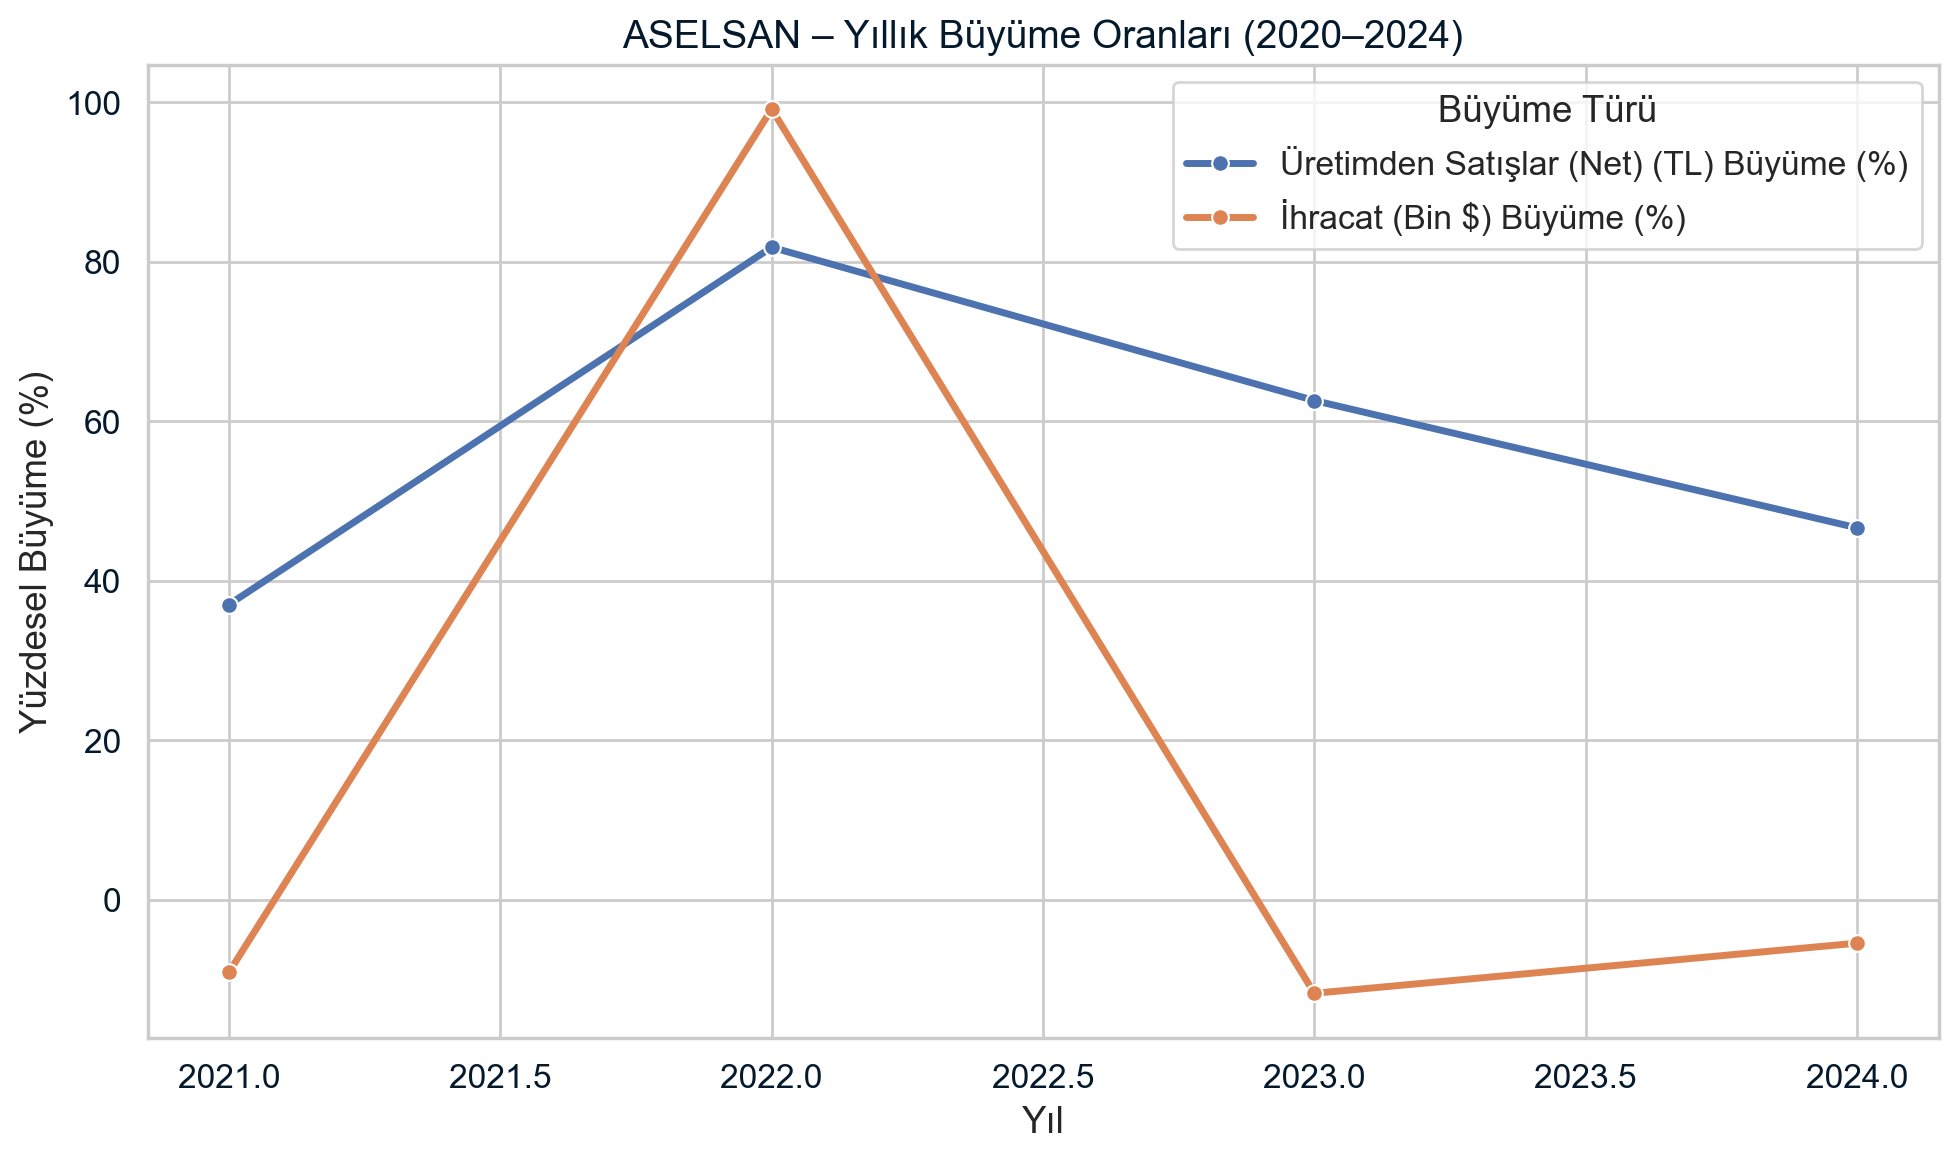

In [293]:
# ASELSAN GRAPH
df_aselsan_plot = df_aselsan.copy()

df_melted_aselsan = df_aselsan[["Yıl", 
                              "Üretimden Satışlar (Net) (TL) Büyüme (%)", 
                              "İhracat (Bin $) Büyüme (%)"]].melt(
    id_vars="Yıl", 
    var_name="Kalem", 
    value_name="Büyüme (%)"
)

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted_aselsan, x="Yıl", y="Büyüme (%)", hue="Kalem", marker="o", linewidth=2.5)

plt.title("ASELSAN – Yıllık Büyüme Oranları (2020–2024)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Yüzdesel Büyüme (%)")
plt.legend(title="Büyüme Türü")
plt.tight_layout()
plt.show()

In [294]:
# HAVELSAN
df_havelsan = df_all[df_all["Kuruluş Adı"].str.contains("HAVELSAN", case=False, na=False)]
df_havelsan = büyüme_columnları(df_havelsan)
df_havelsan

2020-2024 Üretimden Satışlar (Net) (TL) Büyüme (%): 467.34
2020-2024 Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%): 404.28
2020-2024 İhracat (Bin $) Büyüme (%): 417.40


,Genel Sıra No,Kuruluş Adı,Yıl,Üretimden Satışlar (Net) (TL),Brüt Katma Değer (TL),Dönem Karı/Zararı (Vergi Öncesi) (TL),İhracat (Bin $),İhracat - Genel Sıra No,Ücretle Çalışanlar Ortalaması (Kişi),Üretimden Satışlar (Net) (TL) Büyüme (%),Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%),İhracat (Bin $) Büyüme (%)
0,126,HAVELSAN Hava Elektronik San. ve Tic. A.Ş.,2020,1.970350e+09,9.378193e+08,2.836282e+08,16637.0,384.0,1953.0,NaN,NaN,NaN
1,351,HAVELSAN Hava Elektronik San. ve Tic. A.Ş.,2021,1.393881e+09,1.038576e+09,1.241597e+08,NaN,NaN,2103.0,-29.257159,-56.224503,0.000000
2,252,HAVELSAN Hava Elektronik San. ve Tic. A.Ş.,2022,3.920467e+09,3.078468e+09,8.588578e+08,55871.0,328.0,2346.0,181.262580,591.736540,235.823766
3,235,HAVELSAN Hava Elektronik San. ve Tic. A.Ş.,2023,6.196282e+09,5.025915e+09,1.052689e+09,75045.0,257.0,2465.0,58.049597,22.568512,34.318340
4,179,HAVELSAN Hava Elektronik San. ve Tic. A.Ş.,2024,1.117860e+10,6.393339e+09,1.430290e+09,86080.0,241.0,2550.0,80.408125,35.870155,14.704511


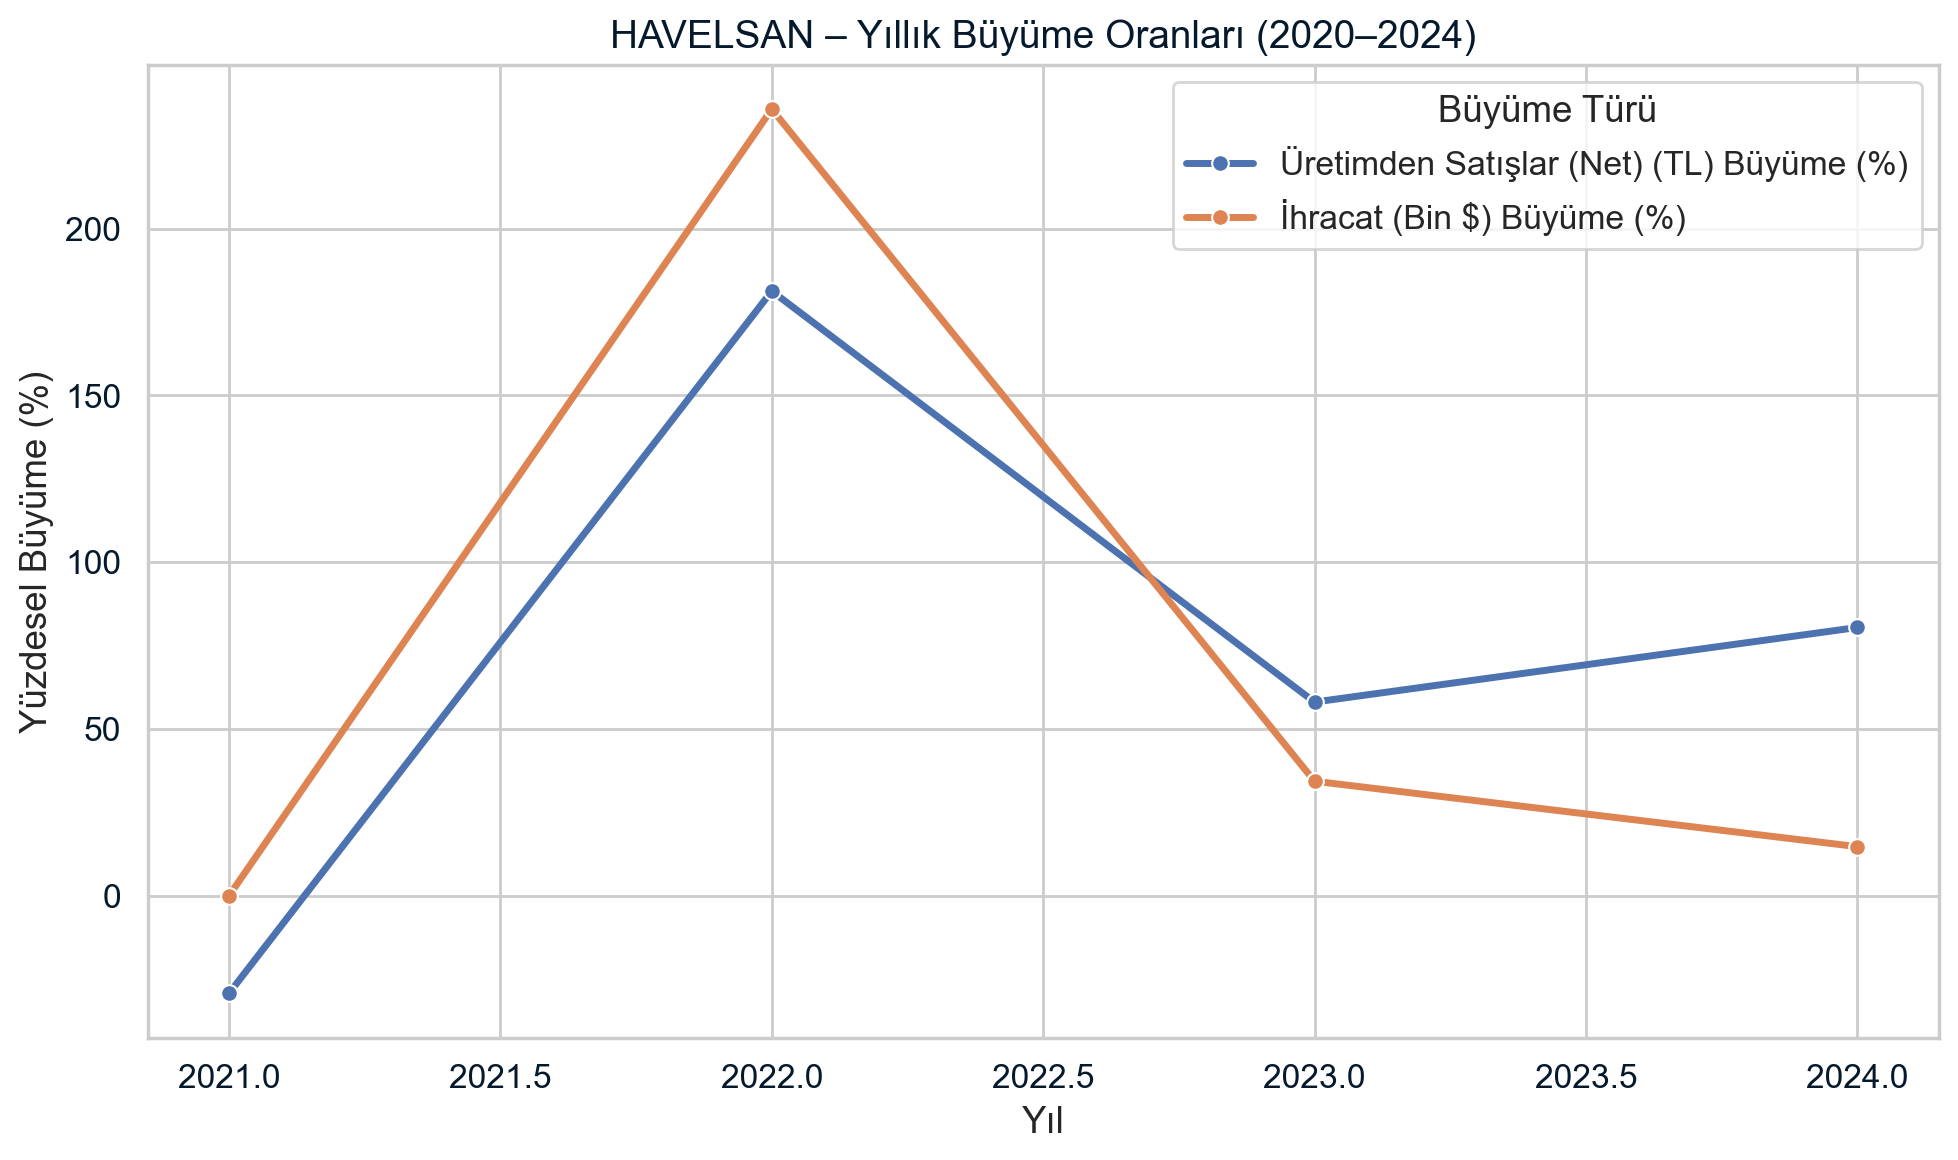

In [295]:
# HAVELSAN GRAPH
df_havelsan_plot = df_havelsan.copy()

df_melted_havelsan = df_havelsan[["Yıl", 
                              "Üretimden Satışlar (Net) (TL) Büyüme (%)", 
                              "İhracat (Bin $) Büyüme (%)"]].melt(
    id_vars="Yıl", 
    var_name="Kalem", 
    value_name="Büyüme (%)"
)

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted_havelsan, x="Yıl", y="Büyüme (%)", hue="Kalem", marker="o", linewidth=2.5)

plt.title("HAVELSAN – Yıllık Büyüme Oranları (2020–2024)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Yüzdesel Büyüme (%)")
plt.legend(title="Büyüme Türü")
plt.tight_layout()
plt.show()

In [296]:
# OTOKAR
df_otokar = df_all[df_all["Kuruluş Adı"].str.contains("Otokar", case=False, na=False)]
df_otokar = büyüme_columnları(df_otokar)
df_otokar

2020-2024 Üretimden Satışlar (Net) (TL) Büyüme (%): 820.94
2020-2024 Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%): -638.61
2020-2024 İhracat (Bin $) Büyüme (%): 73.66


,Genel Sıra No,Kuruluş Adı,Yıl,Üretimden Satışlar (Net) (TL),Brüt Katma Değer (TL),Dönem Karı/Zararı (Vergi Öncesi) (TL),İhracat (Bin $),İhracat - Genel Sıra No,Ücretle Çalışanlar Ortalaması (Kişi),Üretimden Satışlar (Net) (TL) Büyüme (%),Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%),İhracat (Bin $) Büyüme (%)
0,83,Otokar Otomotiv ve Savunma Sanayi A.Ş.,2020,2.793569e+09,1.139233e+09,5.975765e+08,330999.0,30.0,2152.0,NaN,NaN,NaN
1,122,Otokar Otomotiv ve Savunma Sanayi A.Ş.,2021,3.480191e+09,1.386826e+09,7.664573e+08,283843.0,60.0,2295.0,24.578676,28.260962,-14.246569
2,97,Otokar Otomotiv ve Savunma Sanayi A.Ş.,2022,8.546443e+09,3.244734e+09,7.696056e+08,398278.0,42.0,3194.0,145.573944,0.410751,40.316302
3,59,Otokar Otomotiv ve Savunma Sanayi A.Ş.,2023,1.973836e+10,6.367205e+09,7.830681e+08,646267.0,26.0,4159.0,130.954089,1.749279,62.265302
4,59,Otokar Otomotiv ve Savunma Sanayi A.Ş.,2024,2.572706e+10,7.456357e+09,-3.218614e+09,574813.0,25.0,4245.0,30.340413,-511.026012,-11.056421


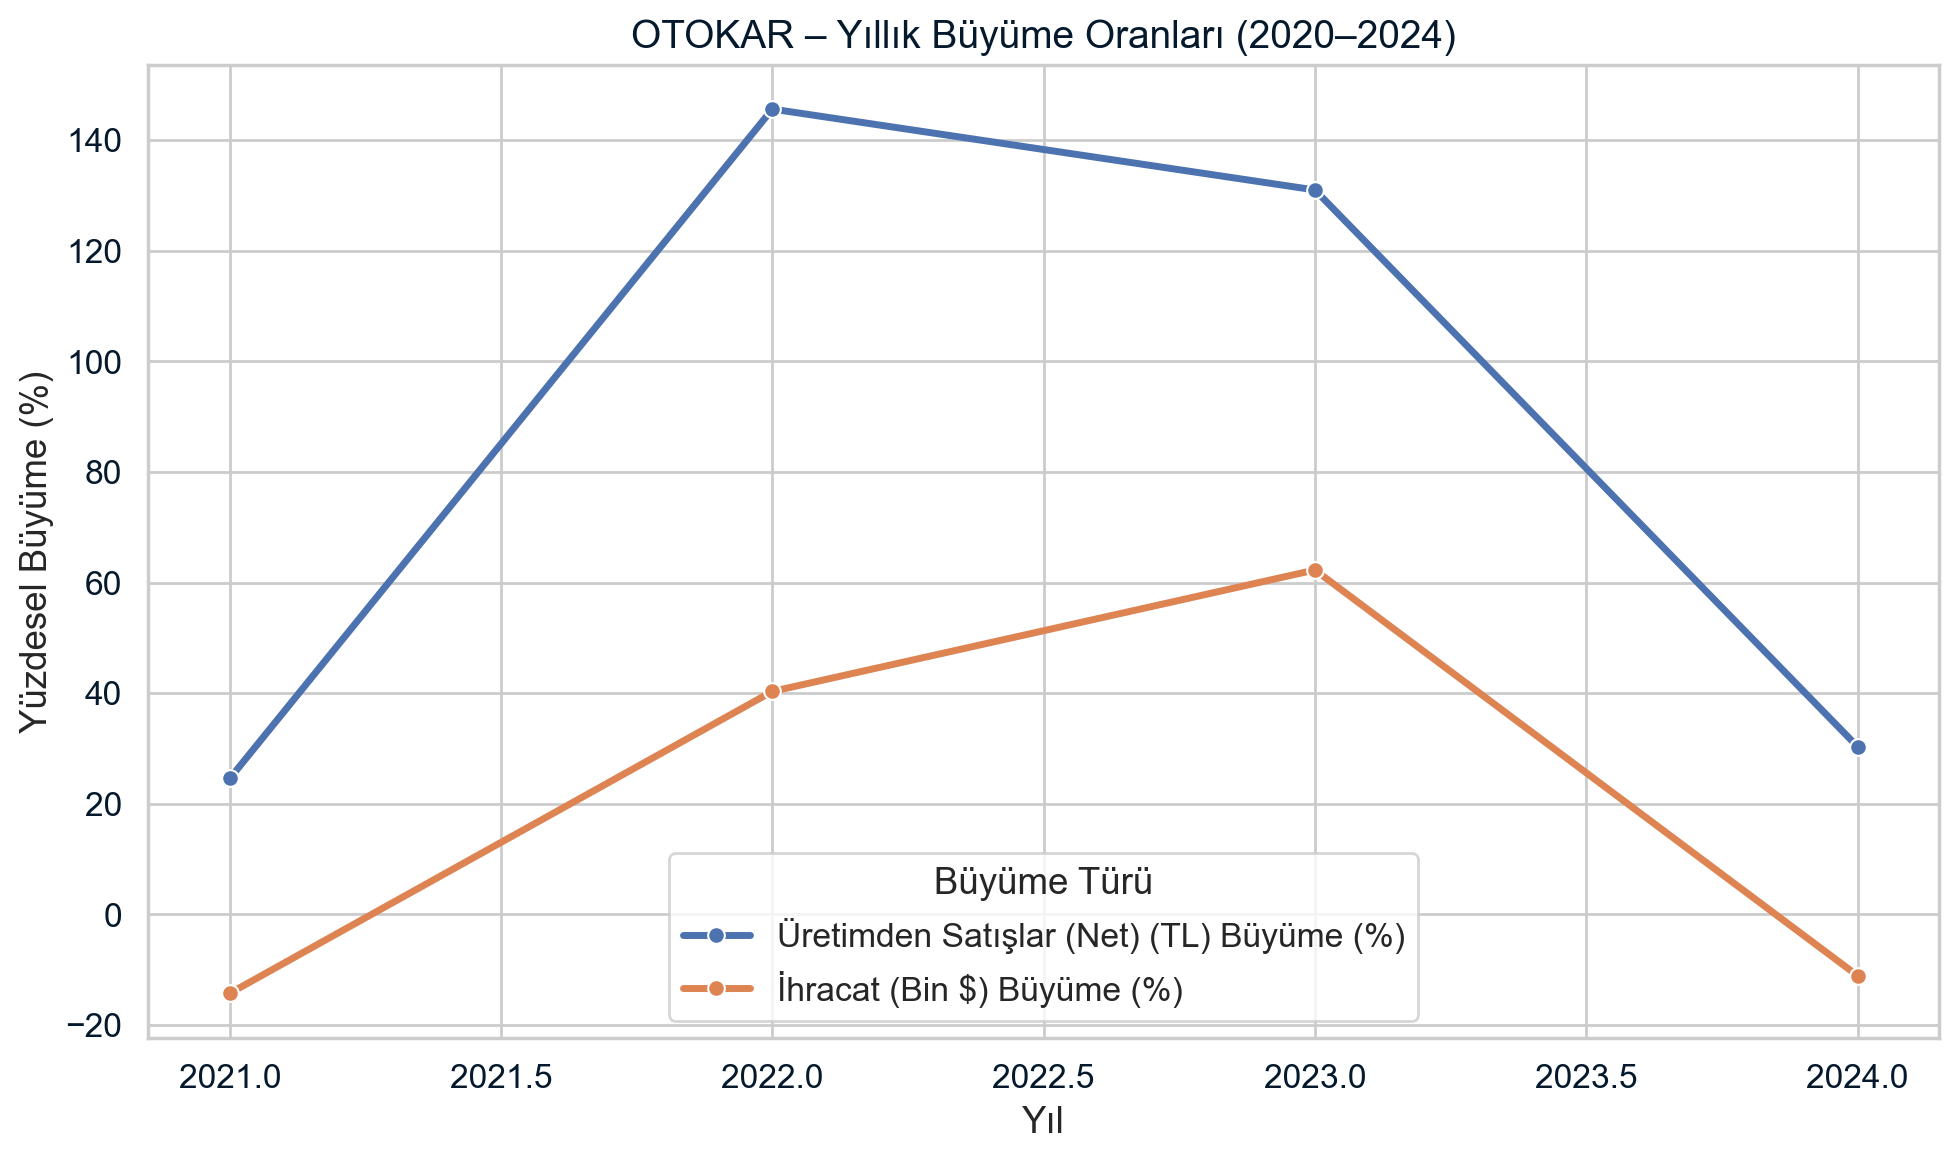

In [297]:
# OTOKAR GRAPH
df_otokar_plot = df_otokar.copy()

df_melted_otokar = df_otokar[["Yıl", 
                              "Üretimden Satışlar (Net) (TL) Büyüme (%)", 
                              "İhracat (Bin $) Büyüme (%)"]].melt(
    id_vars="Yıl", 
    var_name="Kalem", 
    value_name="Büyüme (%)"
)

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted_otokar, x="Yıl", y="Büyüme (%)", hue="Kalem", marker="o", linewidth=2.5)

plt.title("OTOKAR – Yıllık Büyüme Oranları (2020–2024)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Yüzdesel Büyüme (%)")
plt.legend(title="Büyüme Türü")
plt.tight_layout()
plt.show()

In [298]:
# BMC
df_bmc = df_all[df_all["Kuruluş Adı"].str.contains("BMC", case=False, na=False)]
df_bmc = büyüme_columnları(df_bmc)
df_bmc

2020-2024 Üretimden Satışlar (Net) (TL) Büyüme (%): 563.13
2020-2024 Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%): nan
2020-2024 İhracat (Bin $) Büyüme (%): 146.04


,Genel Sıra No,Kuruluş Adı,Yıl,Üretimden Satışlar (Net) (TL),Brüt Katma Değer (TL),Dönem Karı/Zararı (Vergi Öncesi) (TL),İhracat (Bin $),İhracat - Genel Sıra No,Ücretle Çalışanlar Ortalaması (Kişi),Üretimden Satışlar (Net) (TL) Büyüme (%),Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%),İhracat (Bin $) Büyüme (%)
0,144,BMC Otomotiv San. ve Tic. A.Ş.,2020,1.831089e+09,NaN,NaN,75545.0,202.0,2845.0,NaN,NaN,NaN
1,135,BMC Otomotiv San. ve Tic. A.Ş.,2021,3.201625e+09,NaN,NaN,170729.0,101.0,2827.0,74.848174,NaN,125.996426
2,131,BMC Otomotiv San. ve Tic. A.Ş.,2022,6.990694e+09,NaN,NaN,367284.0,44.0,2455.0,118.348312,NaN,115.126897
3,150,BMC Otomotiv San. ve Tic. A.Ş.,2023,9.295863e+09,NaN,NaN,288933.0,63.0,2697.0,32.974824,NaN,-21.332538
4,162,BMC Otomotiv San. ve Tic. A.Ş.,2024,1.214241e+10,NaN,NaN,185873.0,121.0,2684.0,30.621686,NaN,-35.669169


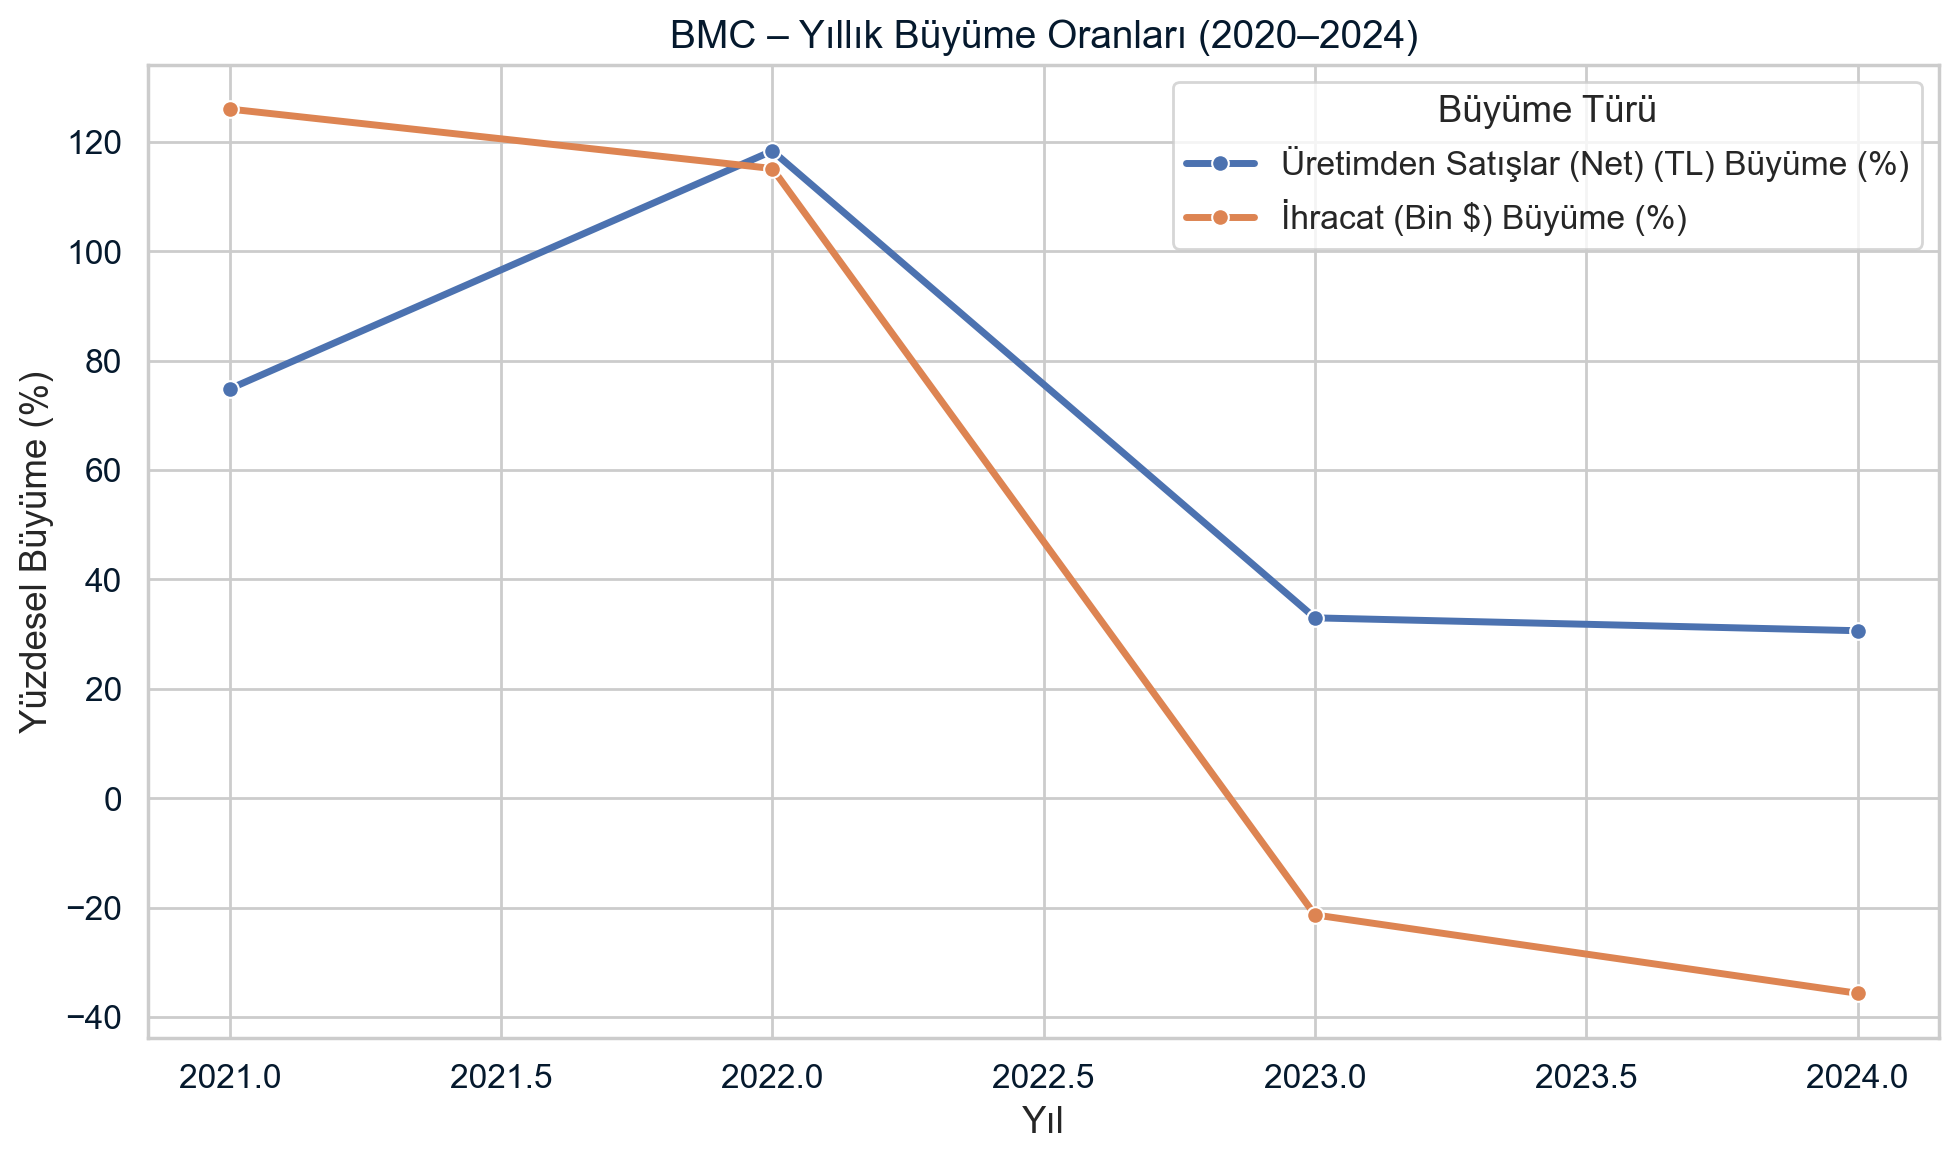

In [299]:
# BMC GRAPH
df_bmc_plot = df_bmc.copy()

df_melted_bmc = df_bmc[["Yıl", 
                              "Üretimden Satışlar (Net) (TL) Büyüme (%)", 
                              "İhracat (Bin $) Büyüme (%)"]].melt(
    id_vars="Yıl", 
    var_name="Kalem", 
    value_name="Büyüme (%)"
)

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted_bmc, x="Yıl", y="Büyüme (%)", hue="Kalem", marker="o", linewidth=2.5)

plt.title("BMC – Yıllık Büyüme Oranları (2020–2024)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Yüzdesel Büyüme (%)")
plt.legend(title="Büyüme Türü")
plt.tight_layout()
plt.show()

In [300]:
# Koluman (2021'de ikinci 500'de. 2020'de hiç yok.)
df_koluman = df_all[df_all["Kuruluş Adı"].str.contains("Koluman", case=False, na=False)]
df_koluman

df_koluman_ikinci = df_all_ikinci[df_all_ikinci["Kuruluş Adı"].str.contains("Koluman", case=False, na=False)]
df_koluman_ikinci

df_koluman_tüm = pd.concat([df_koluman, df_koluman_ikinci], ignore_index=True)
df_koluman_tüm = df_koluman_tüm.sort_values(by="Yıl").reset_index(drop=True)

df_koluman = büyüme_columnları(df_koluman_tüm)
df_koluman

2020 veya 2024 yılı verisi eksik: Üretimden Satışlar (Net) (TL)
2020 veya 2024 yılı verisi eksik: Dönem Karı/Zararı (Vergi Öncesi) (TL)
2020 veya 2024 yılı verisi eksik: İhracat (Bin $)


,Genel Sıra No,Kuruluş Adı,Yıl,Üretimden Satışlar (Net) (TL),Brüt Katma Değer (TL),Dönem Karı/Zararı (Vergi Öncesi) (TL),İhracat (Bin $),İhracat - Genel Sıra No,Ücretle Çalışanlar Ortalaması (Kişi),Üretimden Satışlar (Net) (TL) Büyüme (%),Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%),İhracat (Bin $) Büyüme (%)
0,119,Koluman Otomotiv Endüstri A.Ş.,2021,8.055407e+08,1.847887e+08,38206687.0,34206.0,175.0,499.0,NaN,NaN,NaN
1,418,Koluman Otomotiv Endüstri A.Ş.,2022,2.448770e+09,3.749438e+08,122363699.0,38851.0,362.0,770.0,203.990900,220.267756,13.579489
2,254,Koluman Otomotiv Endüstri A.Ş.,2023,5.767405e+09,1.062953e+09,348879282.0,60174.0,282.0,822.0,135.522493,185.116652,54.884044
3,278,Koluman Otomotiv Endüstri A.Ş.,2024,7.524088e+09,NaN,NaN,53339.0,295.0,966.0,30.458819,0.000000,-11.358726


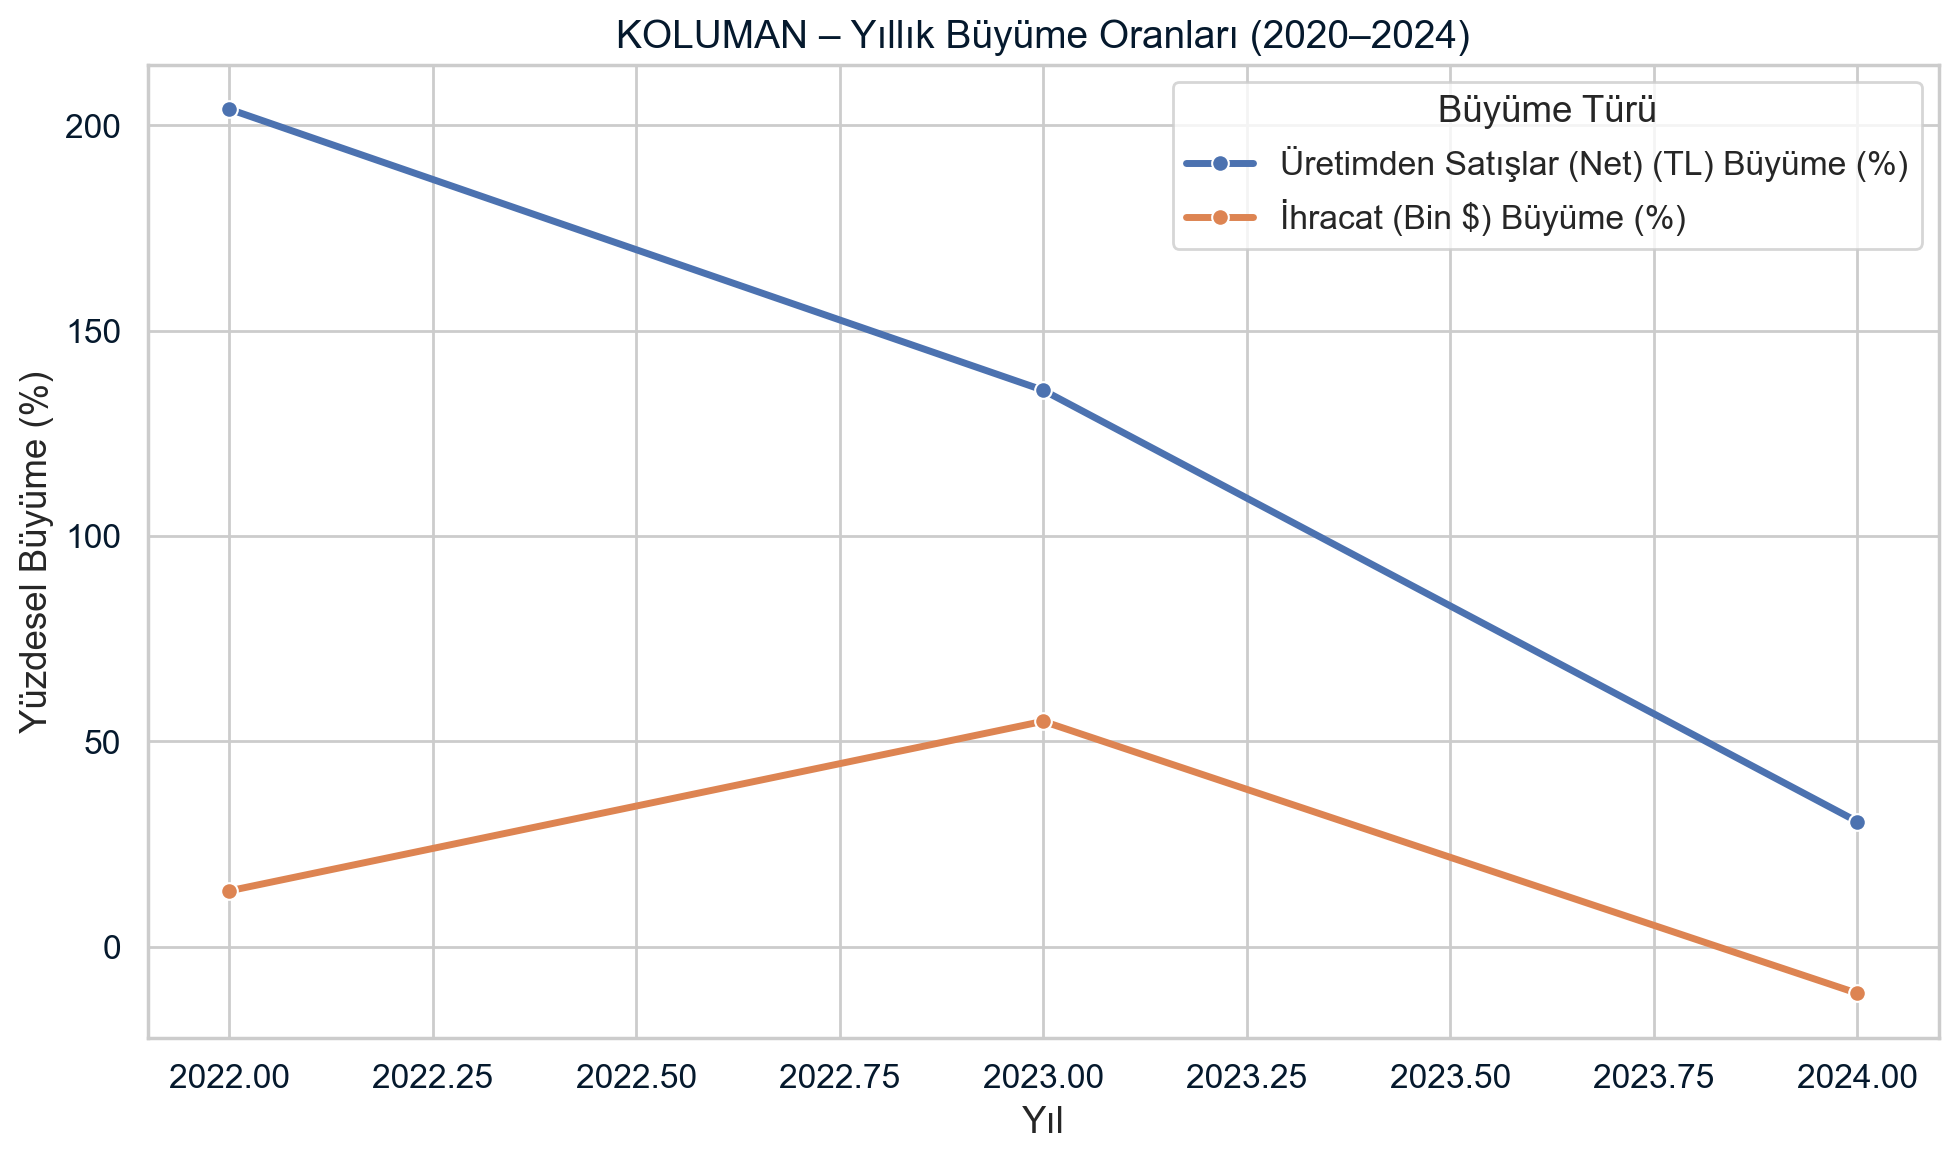

In [301]:
# KOLUMAN GRAPH
df_koluman_plot = df_koluman.copy()

df_melted_koluman = df_koluman[["Yıl", 
                              "Üretimden Satışlar (Net) (TL) Büyüme (%)", 
                              "İhracat (Bin $) Büyüme (%)"]].melt(
    id_vars="Yıl", 
    var_name="Kalem", 
    value_name="Büyüme (%)"
)

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted_koluman, x="Yıl", y="Büyüme (%)", hue="Kalem", marker="o", linewidth=2.5)

plt.title("KOLUMAN – Yıllık Büyüme Oranları (2020–2024)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Yüzdesel Büyüme (%)")
plt.legend(title="Büyüme Türü")
plt.tight_layout()
plt.show()

In [302]:
# Nurol (2023, 2021 ve 2020'de ilk 500'de değil.)
df_nurol = df_all[df_all["Kuruluş Adı"].str.contains("Nurol", case=False, na=False)]
df_nurol

df_nurol_ikinci = df_all_ikinci[df_all_ikinci["Kuruluş Adı"].str.contains("Nurol", case=False, na=False)]
df_nurol_ikinci

df_nurol_tüm = pd.concat([df_nurol, df_nurol_ikinci], ignore_index=True)
df_nurol_tüm = df_nurol_tüm.sort_values(by="Yıl").reset_index(drop=True)

df_nurol = büyüme_columnları(df_nurol_tüm)
df_nurol

2020-2024 Üretimden Satışlar (Net) (TL) Büyüme (%): 1152.47
2020-2024 Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%): nan
2020-2024 İhracat (Bin $) Büyüme (%): 53.55


,Genel Sıra No,Kuruluş Adı,Yıl,Üretimden Satışlar (Net) (TL),Brüt Katma Değer (TL),Dönem Karı/Zararı (Vergi Öncesi) (TL),İhracat (Bin $),İhracat - Genel Sıra No,Ücretle Çalışanlar Ortalaması (Kişi),Üretimden Satışlar (Net) (TL) Büyüme (%),Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%),İhracat (Bin $) Büyüme (%)
0,237,Nurol Makina ve Sanayi A.Ş.,2020,3.784467e+08,NaN,NaN,84519.0,2.0,546.0,NaN,NaN,NaN
1,43,Nurol Makina ve Sanayi A.Ş.,2021,9.253293e+08,NaN,NaN,55647.0,62.0,564.0,144.507167,NaN,-34.160366
2,485,Nurol Makina ve Sanayi A.Ş.,2022,2.126147e+09,NaN,NaN,114547.0,206.0,605.0,129.771922,NaN,105.845778
3,167,Nurol Makina ve Sanayi A.Ş.,2023,2.150456e+09,NaN,NaN,60726.0,66.0,603.0,1.143322,NaN,-46.985953
4,447,Nurol Makina ve Sanayi A.Ş.,2024,4.739941e+09,NaN,NaN,129779.0,175.0,611.0,120.415681,NaN,113.712413


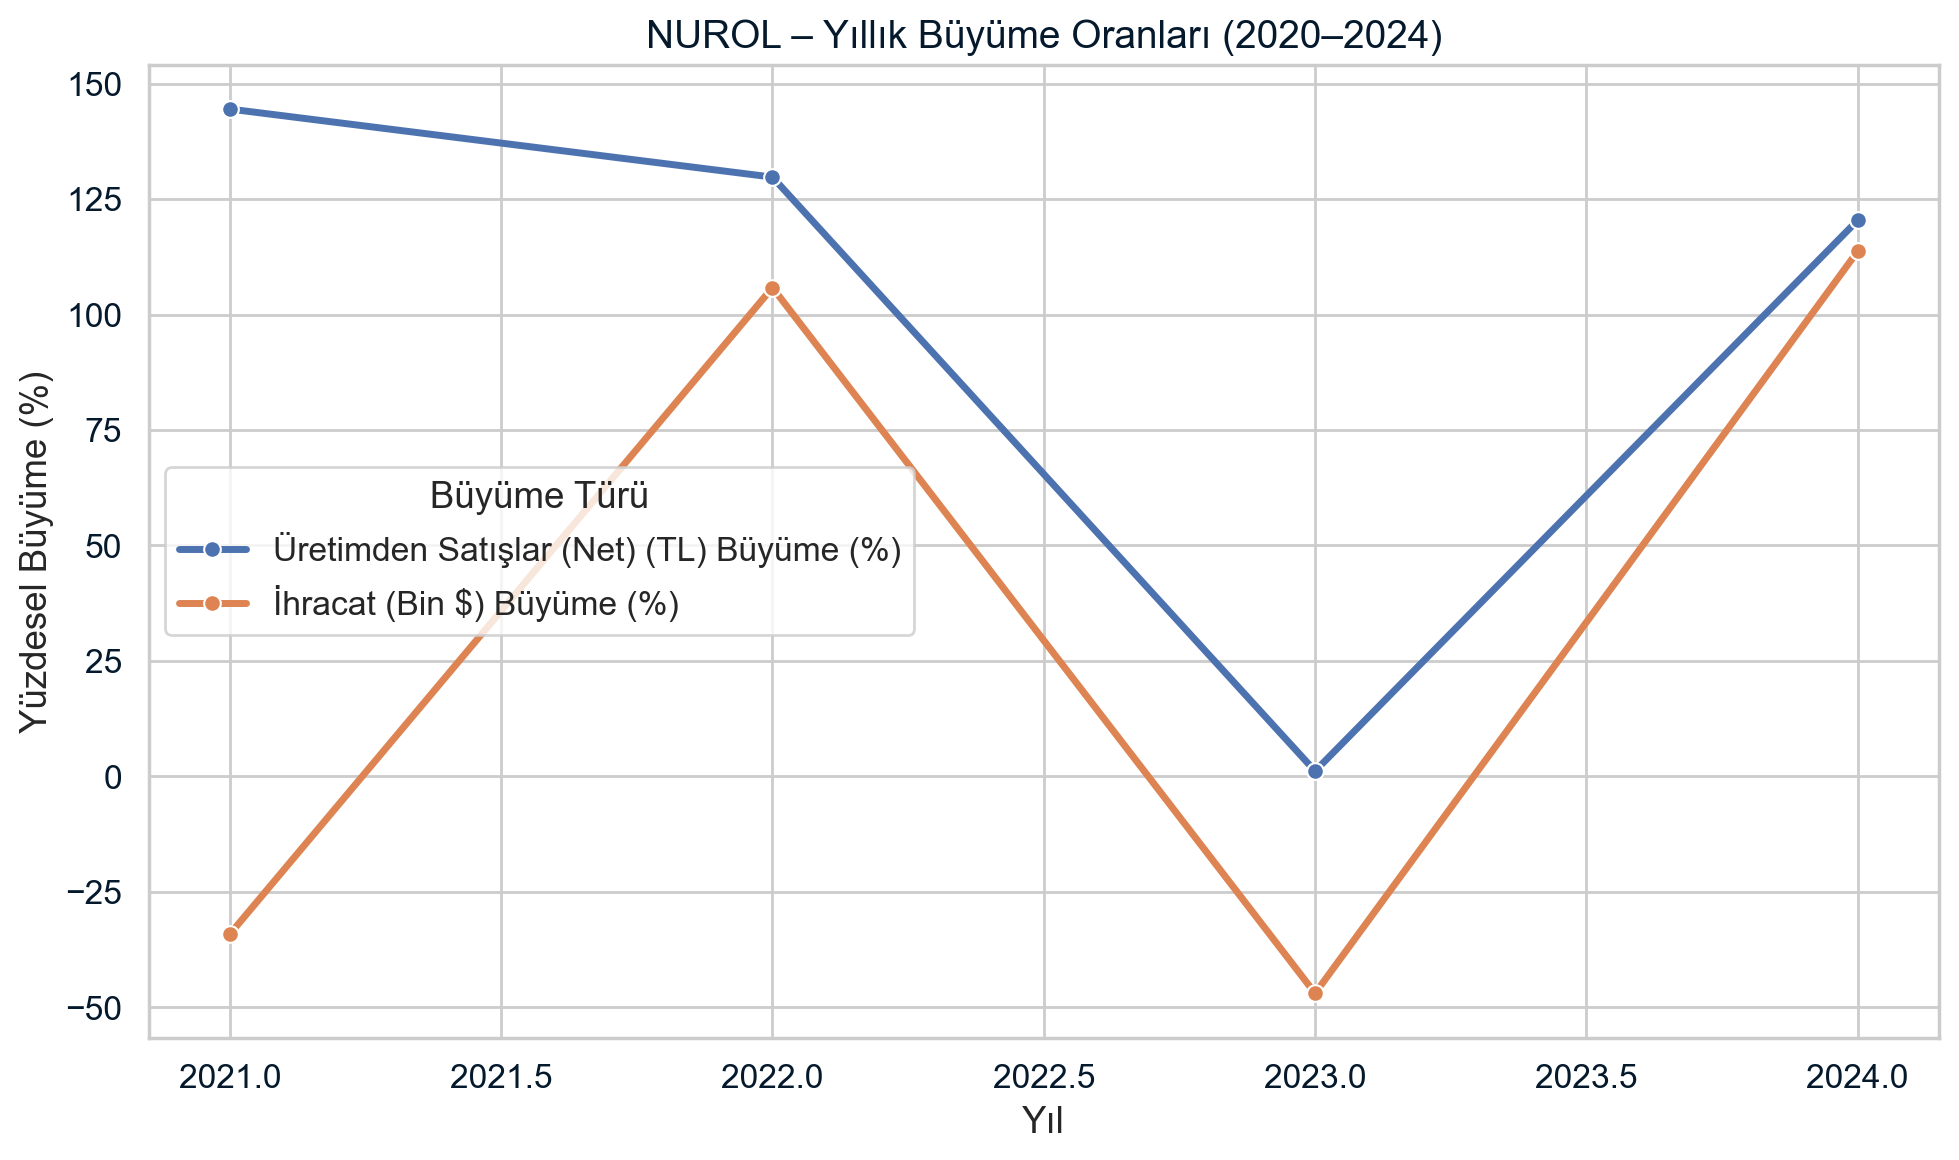

In [303]:
# NUROL GRAPH
df_nurol_plot = df_nurol.copy()

df_melted_nurol = df_nurol[["Yıl", 
                              "Üretimden Satışlar (Net) (TL) Büyüme (%)", 
                              "İhracat (Bin $) Büyüme (%)"]].melt(
    id_vars="Yıl", 
    var_name="Kalem", 
    value_name="Büyüme (%)"
)

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted_nurol, x="Yıl", y="Büyüme (%)", hue="Kalem", marker="o", linewidth=2.5)

plt.title("NUROL – Yıllık Büyüme Oranları (2020–2024)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Yüzdesel Büyüme (%)")
plt.legend(title="Büyüme Türü")
plt.tight_layout()
plt.show()

In [304]:
# TUSAŞ-Türk Havacılık ve Uzay
df_tusas_hava = df_all[df_all["Kuruluş Adı"].str.contains("TUSAŞ-Türk", case=False, na=False)]
df_tusas_hava = büyüme_columnları(df_tusas_hava)
df_tusas_hava

2020-2024 Üretimden Satışlar (Net) (TL) Büyüme (%): 1434.49
2020-2024 Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%): nan
2020-2024 İhracat (Bin $) Büyüme (%): 88.06


,Genel Sıra No,Kuruluş Adı,Yıl,Üretimden Satışlar (Net) (TL),Brüt Katma Değer (TL),Dönem Karı/Zararı (Vergi Öncesi) (TL),İhracat (Bin $),İhracat - Genel Sıra No,Ücretle Çalışanlar Ortalaması (Kişi),Üretimden Satışlar (Net) (TL) Büyüme (%),Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%),İhracat (Bin $) Büyüme (%)
0,31,TUSAŞ-Türk Havacılık ve Uzay Sanayii A.Ş.,2020,6.390271e+09,NaN,NaN,385478.0,26.0,9477.0,NaN,NaN,NaN
1,28,TUSAŞ-Türk Havacılık ve Uzay Sanayii A.Ş.,2021,1.209401e+10,NaN,NaN,359493.0,43.0,10565.0,89.256620,NaN,-6.740981
2,30,TUSAŞ-Türk Havacılık ve Uzay Sanayii A.Ş.,2022,2.514302e+10,1.474028e+10,7.118402e+08,592726.0,24.0,12503.0,107.896427,NaN,64.878315
3,17,TUSAŞ-Türk Havacılık ve Uzay Sanayii A.Ş.,2023,5.518336e+10,2.054939e+10,-6.965589e+09,888585.0,16.0,14763.0,119.477868,-1078.532653,49.914969
4,11,TUSAŞ-Türk Havacılık ve Uzay Sanayii A.Ş.,2024,9.805810e+10,4.202099e+10,2.231288e+09,724930.0,18.0,15515.0,77.695050,-132.033019,-18.417484


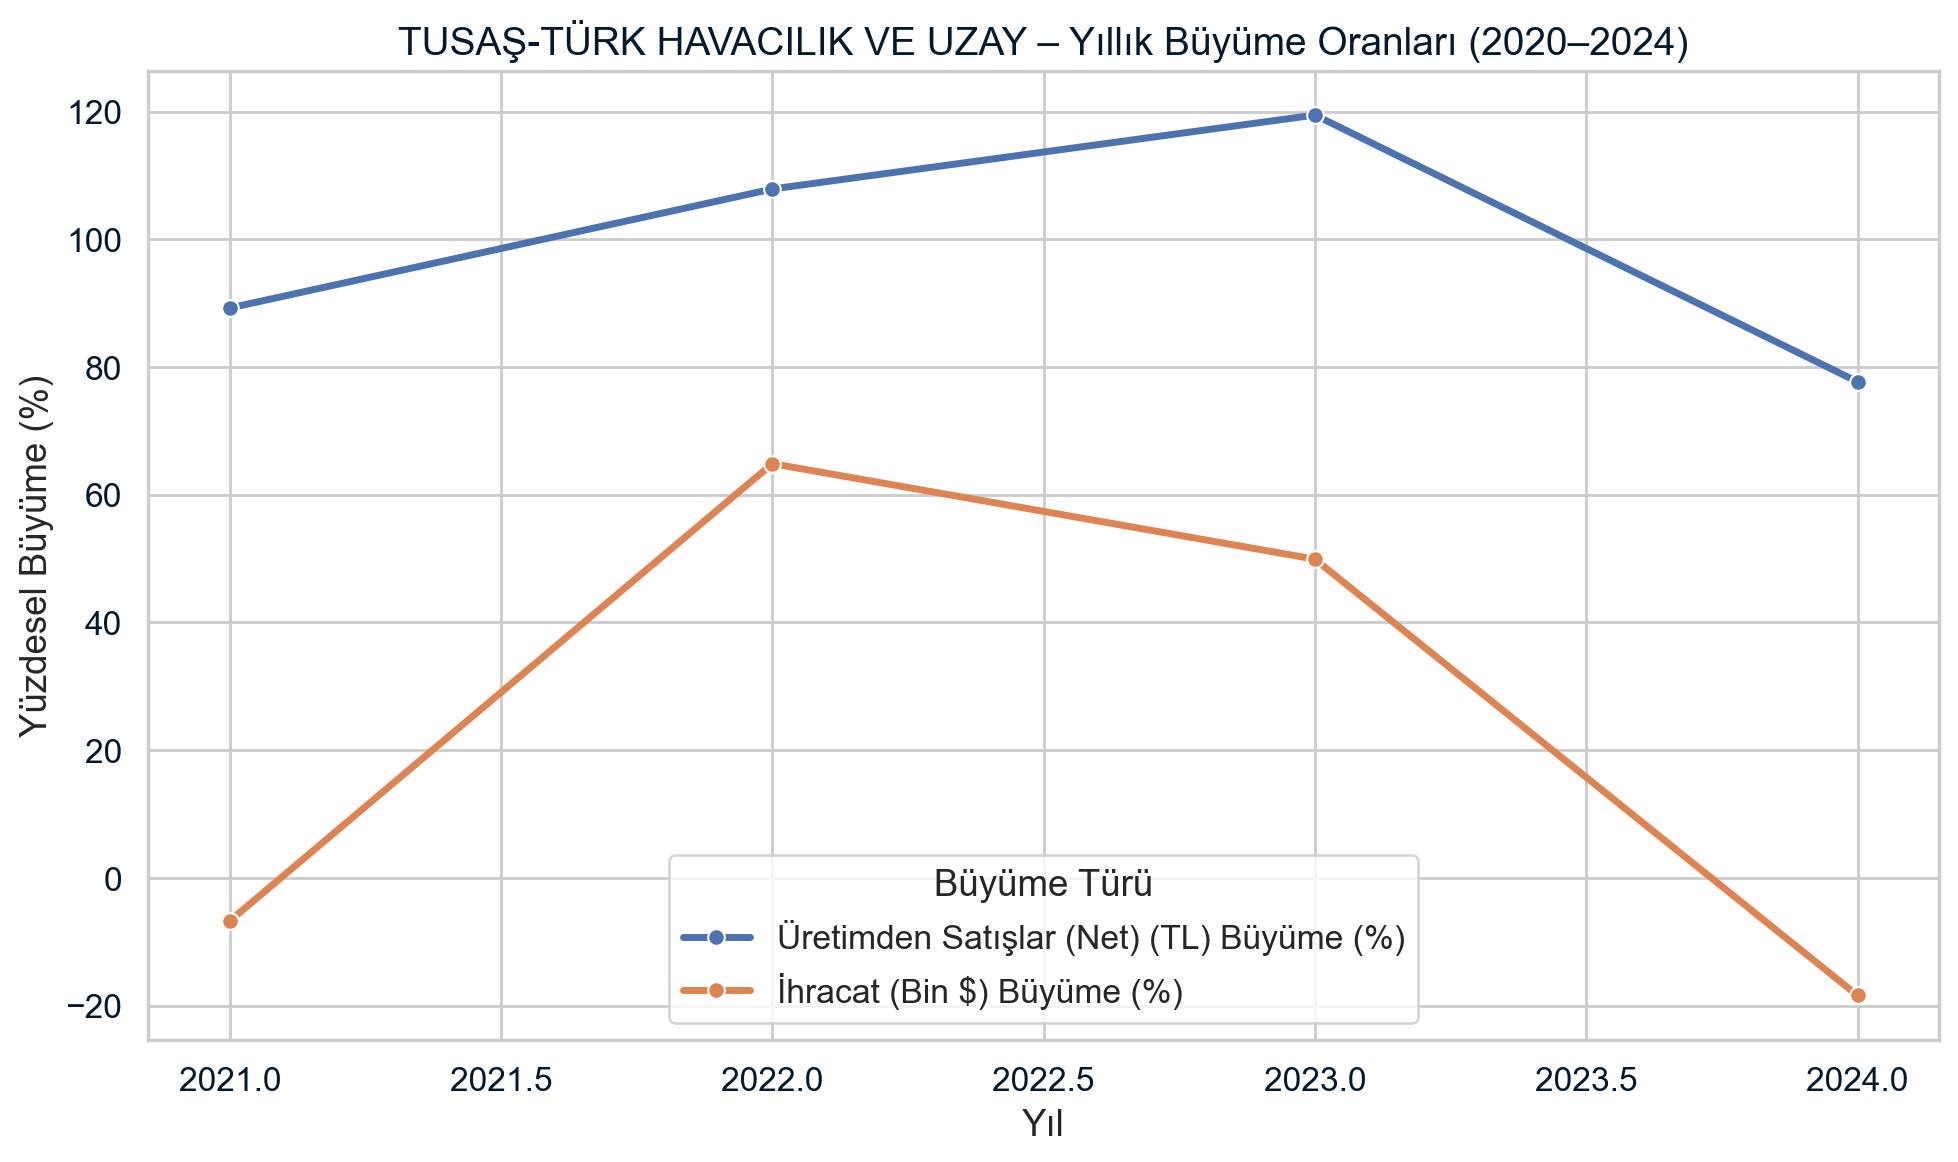

In [305]:
# TUSAŞ-TÜRK HAVACILIK VE UZAY GRAPH
df_tusas_hava_plot = df_tusas_hava.copy()

df_melted_tusas_hava = df_tusas_hava[["Yıl", 
                              "Üretimden Satışlar (Net) (TL) Büyüme (%)", 
                              "İhracat (Bin $) Büyüme (%)"]].melt(
    id_vars="Yıl", 
    var_name="Kalem", 
    value_name="Büyüme (%)"
)

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted_tusas_hava, x="Yıl", y="Büyüme (%)", hue="Kalem", marker="o", linewidth=2.5)

plt.title("TUSAŞ-TÜRK HAVACILIK VE UZAY – Yıllık Büyüme Oranları (2020–2024)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Yüzdesel Büyüme (%)")
plt.legend(title="Büyüme Türü")
plt.tight_layout()
plt.show()

In [306]:
# TUSAŞ Motor
df_tusas_motor = df_all[df_all["Kuruluş Adı"].str.contains("TUSAŞ Motor", case=False, na=False)]
df_tusas_motor = büyüme_columnları(df_tusas_motor)
df_tusas_motor

2020-2024 Üretimden Satışlar (Net) (TL) Büyüme (%): 876.82
2020-2024 Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%): nan
2020-2024 İhracat (Bin $) Büyüme (%): nan


,Genel Sıra No,Kuruluş Adı,Yıl,Üretimden Satışlar (Net) (TL),Brüt Katma Değer (TL),Dönem Karı/Zararı (Vergi Öncesi) (TL),İhracat (Bin $),İhracat - Genel Sıra No,Ücretle Çalışanlar Ortalaması (Kişi),Üretimden Satışlar (Net) (TL) Büyüme (%),Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%),İhracat (Bin $) Büyüme (%)
0,174,Tusaş Motor Sanayii A.Ş.,2020,1.561738e+09,NaN,NaN,166441.0,73.0,NaN,NaN,NaN,NaN
1,181,Tusaş Motor Sanayii A.Ş.,2021,2.541240e+09,NaN,NaN,207708.0,80.0,NaN,62.718743,NaN,24.793771
2,190,Tusaş Motor Sanayii A.Ş.,2022,5.084232e+09,NaN,NaN,NaN,NaN,NaN,100.068920,NaN,0.000000
3,140,Tusaş Motor Sanayii A.Ş.,2023,9.872597e+09,NaN,NaN,341268.0,44.0,NaN,94.180695,NaN,64.301808
4,125,Tusaş Motor Sanayii A.Ş.,2024,1.525544e+10,NaN,NaN,NaN,NaN,NaN,54.523107,NaN,0.000000


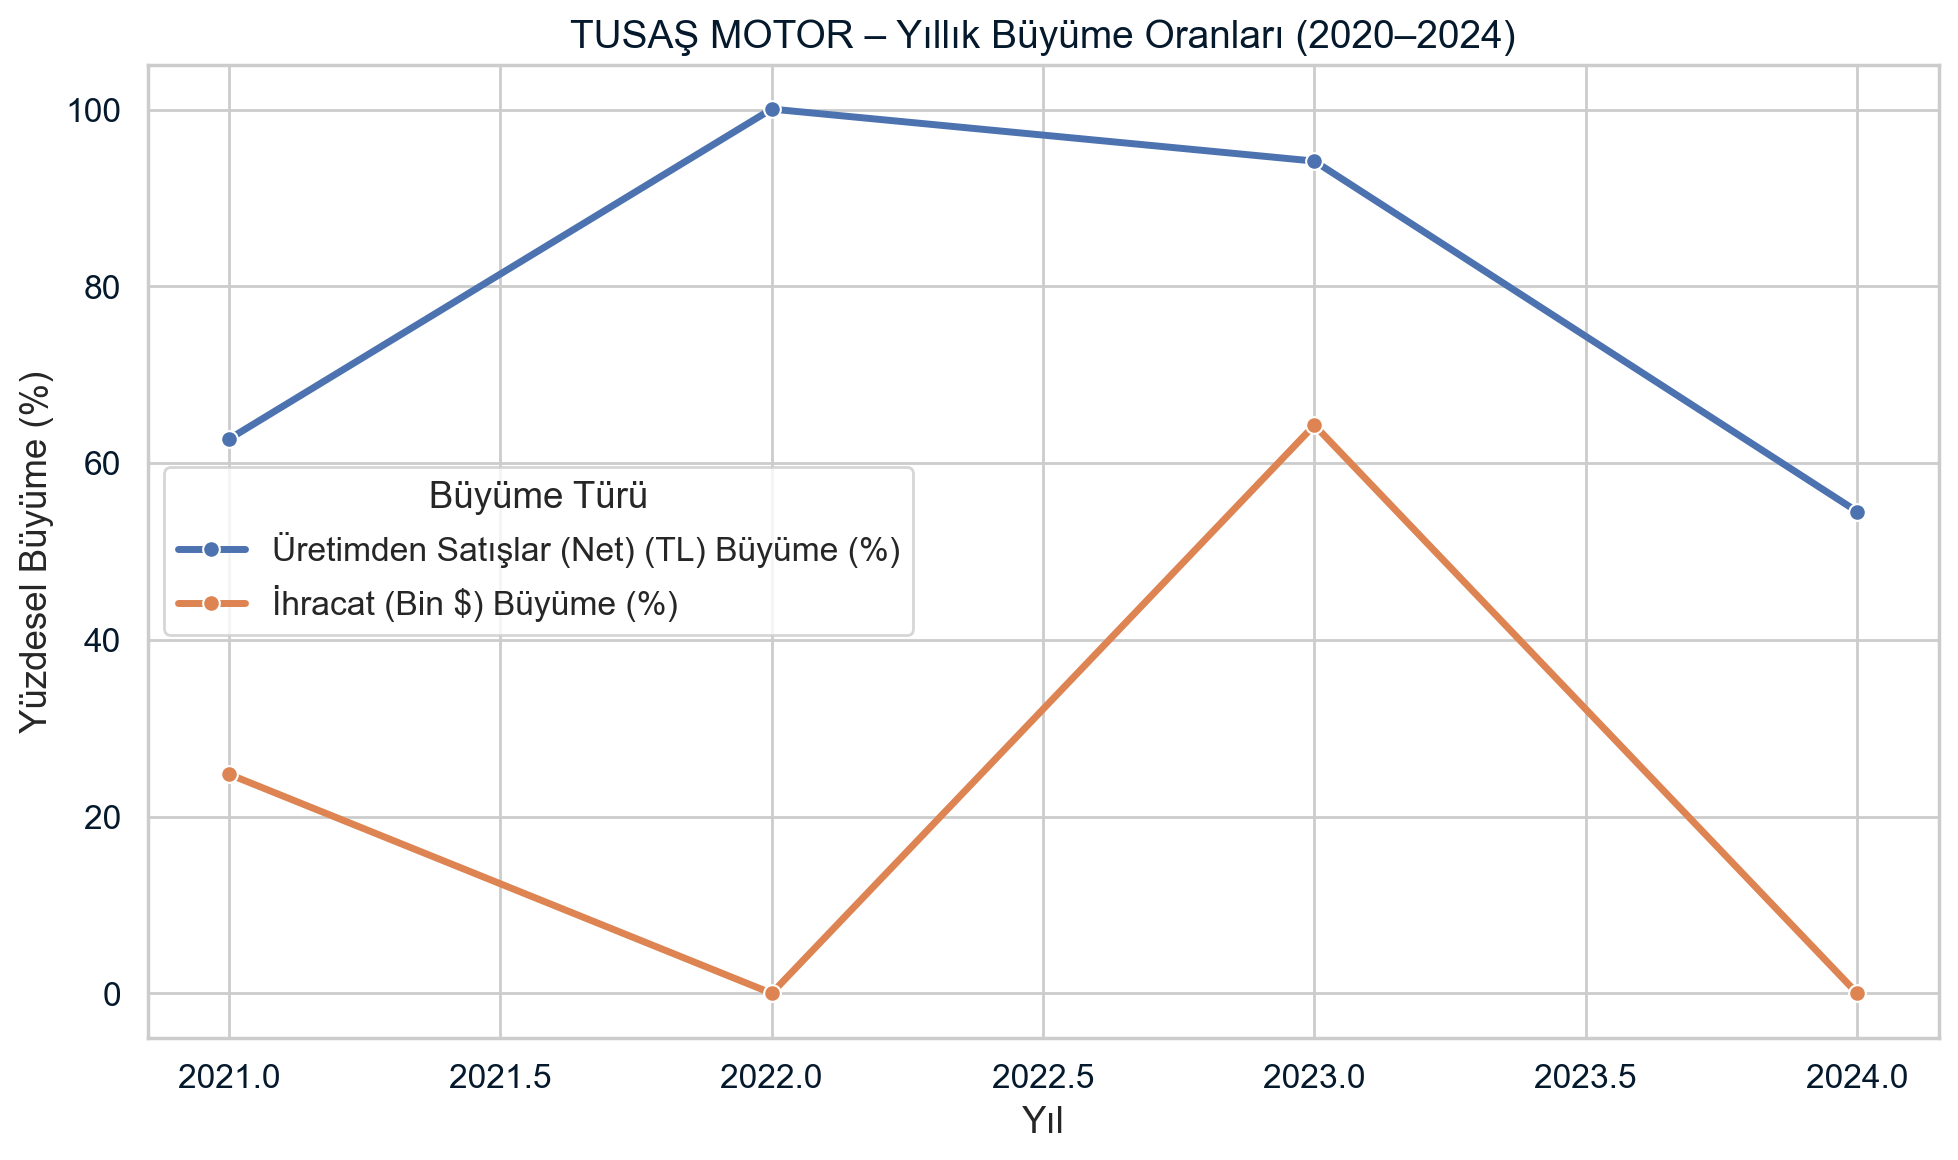

In [307]:
# TUSAŞ MOTOR GRAPH
df_tusas_motor_plot = df_tusas_motor.copy()

df_melted_tusas_motor = df_tusas_motor[["Yıl", 
                              "Üretimden Satışlar (Net) (TL) Büyüme (%)", 
                              "İhracat (Bin $) Büyüme (%)"]].melt(
    id_vars="Yıl", 
    var_name="Kalem", 
    value_name="Büyüme (%)"
)

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted_tusas_motor, x="Yıl", y="Büyüme (%)", hue="Kalem", marker="o", linewidth=2.5)

plt.title("TUSAŞ MOTOR – Yıllık Büyüme Oranları (2020–2024)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Yüzdesel Büyüme (%)")
plt.legend(title="Büyüme Türü")
plt.tight_layout()
plt.show()

In [308]:
# Alp Havacılık?
df_alp_havacılık = df_all[df_all["Kuruluş Adı"].str.contains("Alp Havacılık", case=False, na=False)]
df_alp_havacılık = büyüme_columnları(df_alp_havacılık)
df_alp_havacılık

2020-2024 Üretimden Satışlar (Net) (TL) Büyüme (%): 435.04
2020-2024 Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%): 26.06
2020-2024 İhracat (Bin $) Büyüme (%): 17.90


,Genel Sıra No,Kuruluş Adı,Yıl,Üretimden Satışlar (Net) (TL),Brüt Katma Değer (TL),Dönem Karı/Zararı (Vergi Öncesi) (TL),İhracat (Bin $),İhracat - Genel Sıra No,Ücretle Çalışanlar Ortalaması (Kişi),Üretimden Satışlar (Net) (TL) Büyüme (%),Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%),İhracat (Bin $) Büyüme (%)
0,306,Alp Havacılık San. ve Tic. A.Ş.,2020,9.477574e+08,3.731918e+08,259151195.0,126862.0,107.0,1285.0,NaN,NaN,NaN
1,329,Alp Havacılık San. ve Tic. A.Ş.,2021,1.478207e+09,5.686615e+08,547647872.0,128999.0,151.0,1256.0,55.968948,111.323692,1.684508
2,471,Alp Havacılık San. ve Tic. A.Ş.,2022,2.219402e+09,1.031636e+09,415224265.0,111711.0,214.0,1274.0,50.141500,-24.180429,-13.401654
3,444,Alp Havacılık San. ve Tic. A.Ş.,2023,3.347430e+09,2.161637e+09,611778032.0,119567.0,179.0,1310.0,50.825724,47.336773,7.032432
4,423,Alp Havacılık San. ve Tic. A.Ş.,2024,5.070911e+09,3.264213e+09,326675073.0,149575.0,151.0,1443.0,51.486701,-46.602353,25.097226


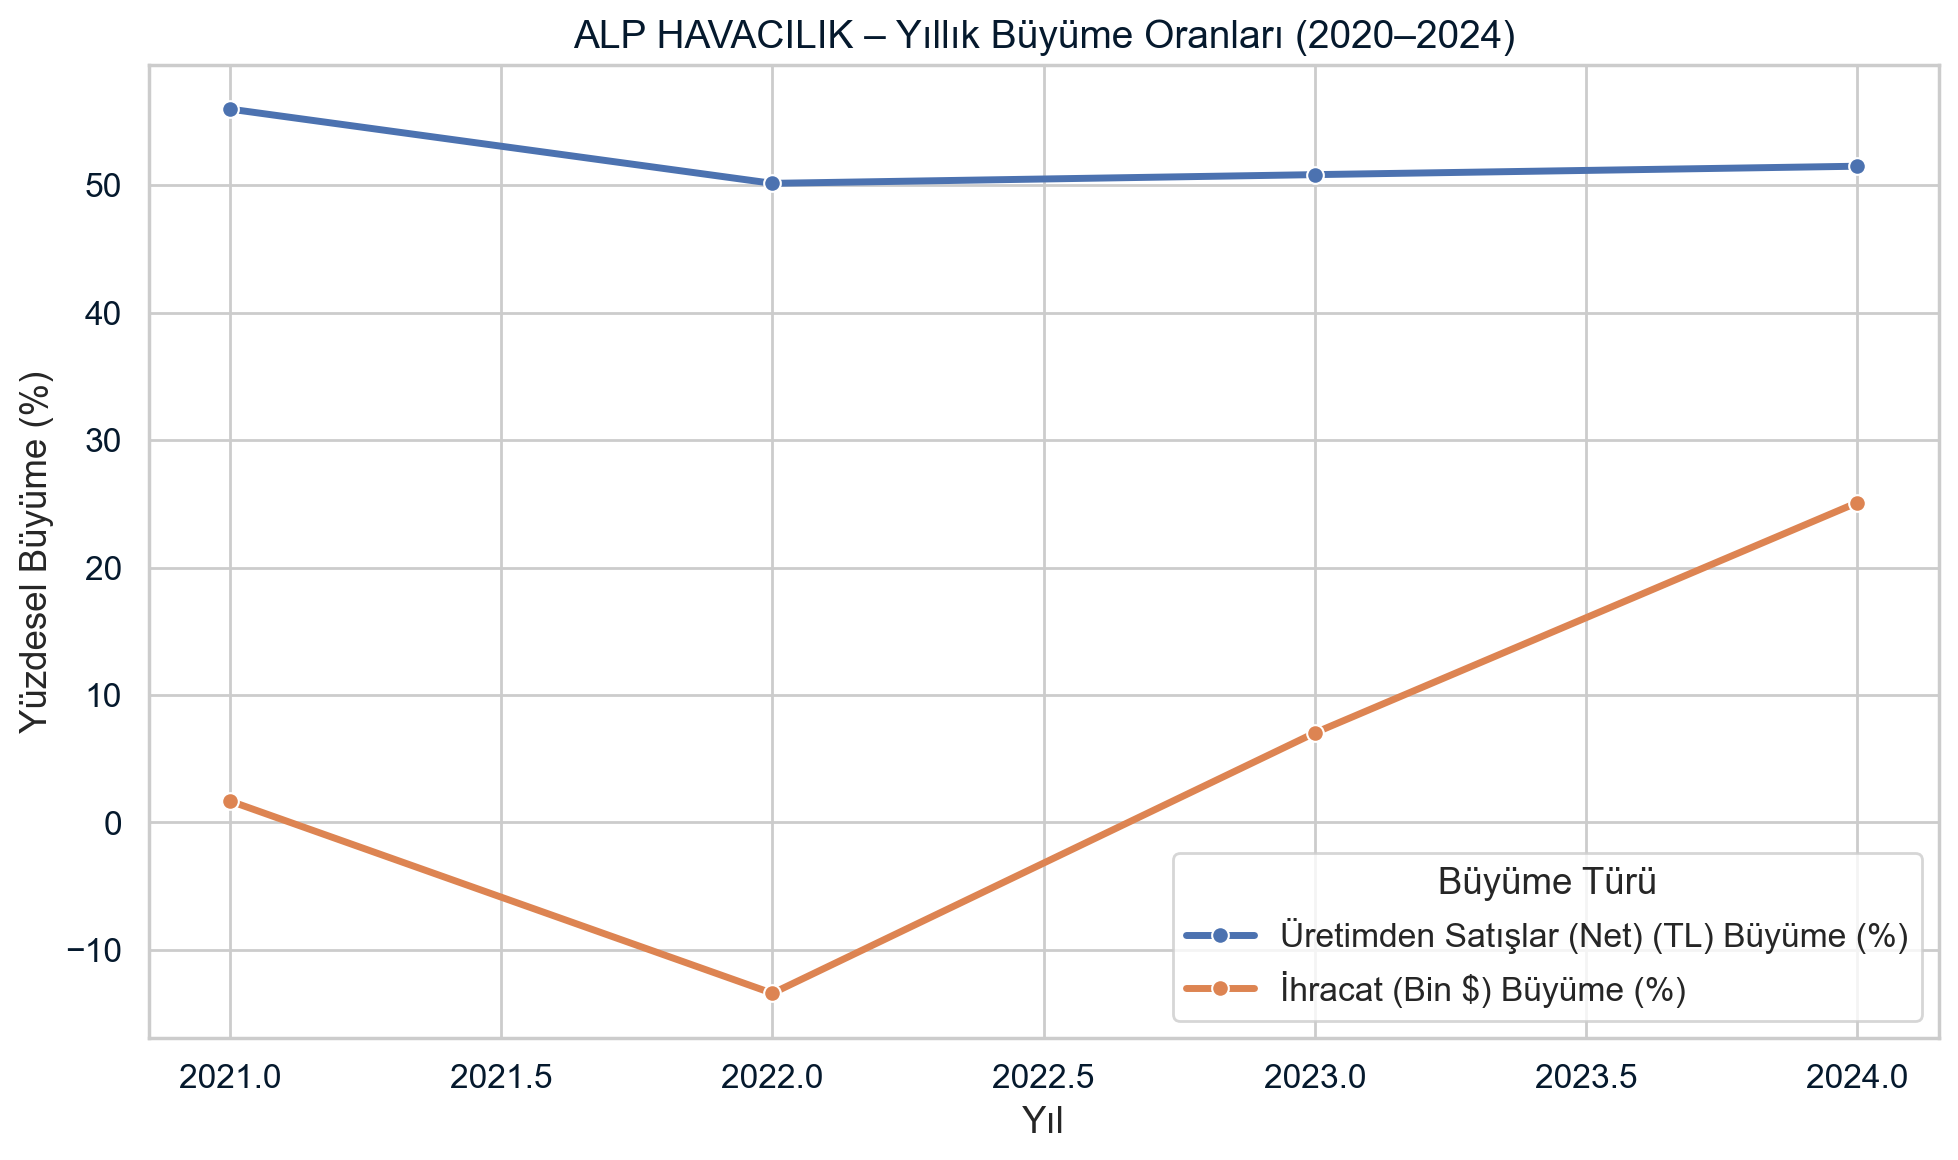

In [309]:
# ALP HAVACILIK GRAPH
df_alp_havacılık_plot = df_alp_havacılık.copy()

df_melted_alp_havacılık = df_alp_havacılık[["Yıl", 
                              "Üretimden Satışlar (Net) (TL) Büyüme (%)", 
                              "İhracat (Bin $) Büyüme (%)"]].melt(
    id_vars="Yıl", 
    var_name="Kalem", 
    value_name="Büyüme (%)"
)

sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted_alp_havacılık, x="Yıl", y="Büyüme (%)", hue="Kalem", marker="o", linewidth=2.5)

plt.title("ALP HAVACILIK – Yıllık Büyüme Oranları (2020–2024)", fontsize=14)
plt.xlabel("Yıl")
plt.ylabel("Yüzdesel Büyüme (%)")
plt.legend(title="Büyüme Türü")
plt.tight_layout()
plt.show()

In [310]:
# En başta 500 firmanın genel büyümesini ve ihracat büyümesini analiz etmiştim. Bu bağlamda 2024 listesinde yer alan 2024 savunma sanayisi firmalarının ortalamasının yıl bazında büyümesini genel liste ile karşılaştıracağım.
savunma_dflist = [df_roketsan, df_mke, df_sys_tüm, df_aselsan, df_havelsan, df_otokar, df_bmc, df_koluman, df_nurol_tüm, df_tusas_hava, df_tusas_motor, df_alp_havacılık]
df_savunma = pd.concat(savunma_dflist, ignore_index=True)

# Verileri NaN yerine "0" girilmiş firmalar var. Bu "0" değerleri NaN olarak değişitriyorum. Böylece ortalamayı olumsuz etkilemeyecek.
# Büyüme kolonlarındaki 0'ları NaN olarak işaretle
df_savunma.loc[df_savunma["Üretimden Satışlar (Net) (TL) Büyüme (%)"] == 0, "Üretimden Satışlar (Net) (TL) Büyüme (%)"] = None
df_savunma.loc[df_savunma["İhracat (Bin $) Büyüme (%)"] == 0, "İhracat (Bin $) Büyüme (%)"] = None
df_savunma.loc[df_savunma["Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%)"] == 0, "Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%)"] = None

df_savunma_yıl_ort = df_savunma.groupby("Yıl")[["Üretimden Satışlar (Net) (TL) Büyüme (%)", "İhracat (Bin $) Büyüme (%)"]].mean().reset_index()
df_savunma_yıl_ort

,Yıl,Üretimden Satışlar (Net) (TL) Büyüme (%),İhracat (Bin $) Büyüme (%)
0,2020,NaN,NaN
1,2021,45.946131,20.394382
2,2022,118.586285,88.243900
3,2023,77.348012,131.513016
4,2024,61.402455,0.161374


In [311]:
# DF_Savunma içerisine column olarak gelir/çalışan sayısı verim columnu girdim. Bu bağlamda firmaların büyümelerine farklı bir bakış açısıyla yaklaşabilirim.
df_savunma["Kişi Başına Gelir (TL)"] = df_savunma["Üretimden Satışlar (Net) (TL)"] / df_savunma["Ücretle Çalışanlar Ortalaması (Kişi)"]
df_savunma["Kişi Başına İhracat ($)"] = df_savunma["İhracat (Bin $)"] * 1000 / df_savunma["Ücretle Çalışanlar Ortalaması (Kişi)"]
df_savunma.groupby(["Kuruluş Adı"]).mean().reset_index()

,Kuruluş Adı,Genel Sıra No,Yıl,Üretimden Satışlar (Net) (TL),Brüt Katma Değer (TL),Dönem Karı/Zararı (Vergi Öncesi) (TL),İhracat (Bin $),İhracat - Genel Sıra No,Ücretle Çalışanlar Ortalaması (Kişi),Üretimden Satışlar (Net) (TL) Büyüme (%),Dönem Karı/Zararı (Vergi Öncesi) (TL) Büyüme (%),İhracat (Bin $) Büyüme (%),Kişi Başına Gelir (TL),Kişi Başına İhracat ($)
0,Alp Havacılık San. ve Tic. A.Ş.,394.60,2022.0,2.612742e+09,1.479868e+09,4.320953e+08,127342.800000,160.400000,1313.60,52.105718,21.969420,5.103128,1.945196e+06,96808.968618
1,Aselsan Elektronik San. ve Tic. A.Ş.,16.80,2022.0,3.932235e+10,2.327150e+10,9.446790e+09,167832.200000,122.600000,9476.40,57.023099,48.586520,18.211490,3.953138e+06,17561.620596
2,BMC Otomotiv San. ve Tic. A.Ş.,144.40,2022.0,6.692337e+09,NaN,NaN,217672.800000,106.200000,2701.60,64.198249,NaN,46.030404,2.518881e+06,82587.180238
3,HAVELSAN Hava Elektronik San. ve Tic. A.Ş.,228.60,2022.0,4.931915e+09,3.294824e+09,7.499250e+08,58408.250000,302.500000,2283.40,72.615786,148.487676,94.948872,2.048057e+06,24133.800382
4,Koluman Otomotiv Endüstri A.Ş.,267.25,2022.5,4.136451e+09,5.408950e+08,1.698166e+08,46642.500000,278.500000,764.25,123.324070,202.692204,19.034936,4.899938e+06,61856.419505
5,Makine ve Kimya Endüstrisi A.Ş.,127.60,2022.0,7.600077e+09,5.487475e+09,2.306992e+09,288611.000000,196.250000,3868.75,65.561711,70.341769,378.405531,2.423975e+06,81470.895559
6,Nurol Makina ve Sanayi A.Ş.,275.80,2022.0,2.064064e+09,NaN,NaN,89043.600000,102.200000,585.80,NaN,NaN,NaN,3.434402e+06,151181.240838
7,Otokar Otomotiv ve Savunma Sanayi A.Ş.,84.00,2022.0,1.205712e+10,3.918871e+09,-6.038123e+07,446840.000000,36.600000,3209.00,82.861781,-120.151255,19.319654,3.259365e+06,138596.782237
8,ROKETSAN Roket San. ve Tic. A.Ş.,53.00,2022.0,1.767043e+10,1.108614e+10,3.099792e+09,364248.000000,39.500000,4938.50,83.406923,88.710071,2.829889,6.580107e+06,73757.830990
9,Samsun Yurt Savunma San. ve Tic. A.Ş.,252.20,2022.0,2.485854e+09,1.101574e+09,4.609859e+08,100866.200000,79.200000,692.80,NaN,NaN,NaN,3.162353e+06,139161.563563


In [312]:
# 12 savunma sanayisi firması verileriyle genel verileri karşılaştırırken bu 12 firmayı ana tablodan çıkartmam gerekli. Bazı firmalar bazı yıllarda kayıp olduğu için süreç kıyaslaması yapmak doğru sonuç vermeyecektir. Bu sebeple sadece sektörün son yıldaki büyümesiyle 12 firmanın büyümesine değineceğim.
savunma_firmalari = [
    "ROKETSAN Roket San. ve Tic. A.Ş.",
    "Makine ve Kimya Endüstrisi A.Ş.",
    "Samsun Yurt Savunma San. ve Tic. A.Ş.",
    "Aselsan Elektronik San. ve Tic. A.Ş.",
    "HAVELSAN Hava Elektronik San. ve Tic. A.Ş.",
    "Otokar Otomotiv ve Savunma Sanayi A.Ş.",
    "BMC Otomotiv San. ve Tic. A.Ş.",
    "Koluman Otomotiv Endüstri A.Ş.",
    "Nurol Makina ve Sanayi A.Ş.",
    "TUSAŞ-Türk Havacılık ve Uzay Sanayii A.Ş.",
    "Tusaş Motor Sanayii A.Ş.",
    "Alp Havacılık San. ve Tic. A.Ş."
]


df_23_24 = df_all[df_all["Yıl"].isin([2023, 2024])]
savunma_firmalari = df_savunma["Kuruluş Adı"].unique()
edited_23_24 = df_23_24[~df_23_24["Kuruluş Adı"].isin(savunma_firmalari)].copy()

# "0" olan değerleri burada da çıkarttım.
edited_23_24[["Üretimden Satışlar (Net) (TL)", "İhracat (Bin $)"]] = \
    edited_23_24[["Üretimden Satışlar (Net) (TL)", "İhracat (Bin $)"]].replace(0, pd.NA)

df_yıl_grouped = (
    edited_23_24.groupby("Yıl")[["Üretimden Satışlar (Net) (TL)", "İhracat (Bin $)"]]
    .sum(min_count=1)
    .sort_index()
)

df_yıl_grouped["Üretimden Satışlar (Net) (TL) Büyüme (%)"] = \
    df_yıl_grouped["Üretimden Satışlar (Net) (TL)"].pct_change() * 100

df_yıl_grouped["İhracat (Bin $) Büyüme (%)"] = \
    df_yıl_grouped["İhracat (Bin $)"].pct_change() * 100

df_yıl_grouped.reset_index(inplace=True)
df_yıl_grouped


,Yıl,Üretimden Satışlar (Net) (TL),İhracat (Bin $),Üretimden Satışlar (Net) (TL) Büyüme (%),İhracat (Bin $) Büyüme (%)
0,2023,6.092983e+12,66176855.0,NaN,NaN
1,2024,8.255935e+12,67871036.0,35.499063,2.560081
